<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-процесса-обработки" data-toc-modified-id="Описание-процесса-обработки-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание процесса обработки</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Данные-об-электродах" data-toc-modified-id="Данные-об-электродах-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Данные об электродах</a></span></li><li><span><a href="#Данные-об-объёме-сыпучих-материалов" data-toc-modified-id="Данные-об-объёме-сыпучих-материалов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Данные об объёме сыпучих материалов</a></span></li><li><span><a href="#Данные-о-времени-подачи-сыпучих-материалов" data-toc-modified-id="Данные-о-времени-подачи-сыпучих-материалов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Данные о времени подачи сыпучих материалов</a></span></li><li><span><a href="#Данные-о-продувке-сплава-газом" data-toc-modified-id="Данные-о-продувке-сплава-газом-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Данные о продувке сплава газом</a></span></li><li><span><a href="#Данные-об-измерениях-температуры" data-toc-modified-id="Данные-об-измерениях-температуры-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Данные об измерениях температуры</a></span></li><li><span><a href="#Данные-об-объёме-проволочных-материалов" data-toc-modified-id="Данные-об-объёме-проволочных-материалов-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Данные об объёме проволочных материалов</a></span></li><li><span><a href="#Данные-о-времени-подачи-проволочных-материалов" data-toc-modified-id="Данные-о-времени-подачи-проволочных-материалов-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Данные о времени подачи проволочных материалов</a></span></li><li><span><a href="#Формирование-надобра-данных-для-моделирования" data-toc-modified-id="Формирование-надобра-данных-для-моделирования-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Формирование надобра данных для моделирования</a></span></li><li><span><a href="#Исследовательский-анализ-данных-объединённой-таблицы" data-toc-modified-id="Исследовательский-анализ-данных-объединённой-таблицы-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Исследовательский анализ данных объединённой таблицы</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Модель-бустинга" data-toc-modified-id="Модель-бустинга-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Модель бустинга</a></span></li><li><span><a href="#Нейросеть" data-toc-modified-id="Нейросеть-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Нейросеть</a></span></li><li><span><a href="#Оптимизация-гипер-параметров" data-toc-modified-id="Оптимизация-гипер-параметров-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Оптимизация гипер-параметров</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

In [1]:
!pip install squarify  
!pip install shap  
!pip install optuna  
!pip install tensorflow==2.10   
!pip install matplotlib  
!pip install seaborn  
!pip install psycopg2
!pip install jinja2
!pip install scikit-learn==1

  Using cached psycopg2-2.9.9.tar.gz (384 kB)
    ERROR: Command errored out with exit status 1:
     command: /opt/conda/bin/python3.9 -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-qtxy89fo/psycopg2_a33165b4aa8a4041998c71ae231a8b2b/setup.py'"'"'; __file__='"'"'/tmp/pip-install-qtxy89fo/psycopg2_a33165b4aa8a4041998c71ae231a8b2b/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-dor9p94m
         cwd: /tmp/pip-install-qtxy89fo/psycopg2_a33165b4aa8a4041998c71ae231a8b2b/
    Complete output (23 lines):
    running egg_info
    creating /tmp/pip-pip-egg-info-dor9p94m/psycopg2.egg-info
    writing /tmp/pip-pip-egg-info-dor9p94m/psycopg2.egg-info/PKG-INFO
    writing dependency_links to /tmp/pip-p

# Описание проекта

Чтобы оптимизировать производственные расходы, металлургический комбинат «Стальная птица» решил уменьшить потребление электроэнергии на этапе обработки стали. Для этого комбинату нужно контролировать температуру сплава. Наша задача — построить модель, которая будет её предсказывать. Заказчик хочет использовать разработанную модель для имитации технологического процесса. 
  
Нужно найти лучшую модель для прогноза последней измеренной температуры. Оценить её качество метрикой MAE. Выбрать лучшую модель по значению метрики на кросс-валидации.  
Проверить качество лучшей модели на тестовой выборке. Значение метрики MAE должно быть менее 6.8.  
Дополнительно нужно оценить R².  

## Описание процесса обработки  

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены на крышке ковша.  
Сначала происходит десульфурация — из стали выводят серу и корректируют её химический состав добавлением примесей. Затем сталь легируют — добавляют в неё куски сплава из бункера для сыпучих материалов или порошковую проволоку через специальный трайб-аппарат.  
Прежде чем в первый раз ввести легирующие добавки, специалисты производят химический анализ стали и измеряют её температуру. Потом температуру на несколько минут повышают, уже после этого добавляют легирующие материалы и продувают сталь инертным газом, чтобы перемешать, а затем снова проводят измерения. Такой цикл повторяется до тех пор, пока не будут достигнуты нужный химический состав стали и оптимальная температура плавки.  
Дальше расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. slab, «плита»).  

## Описание данных  
 
Данные хранятся в базе данных PostgreSQL. Она состоит из нескольких таблиц:  
steel.data_arc — данные об электродах;  
steel.data_bulk — данные об объёме сыпучих материалов;  
steel.data_bulk_time — данные о времени подачи сыпучих материалов;  
steel.data_gas — данные о продувке сплава газом;  
steel.data_temp — данные об измерениях температуры;  
steel.data_wire — данные об объёме проволочных материалов;  
steel.data_wire_time — данные о времени подачи проволочных материалов.  



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine 
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Normalization, Dropout, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import  ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras import layers
from keras.models import Model
import random

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.inspection import PartialDependenceDisplay
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_absolute_error, r2_score

import optuna
from optuna.trial import TrialState
from sklearn.inspection import permutation_importance
from datetime import datetime
from sklearn.inspection import partial_dependence

2024-03-14 10:14:12.055272: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-14 10:14:12.214249: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-14 10:14:12.221754: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-14 10:14:12.221775: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [3]:
tf.config.list_physical_devices('GPU')

2024-03-14 10:14:14.431065: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-14 10:14:14.431150: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-14 10:14:14.431183: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-user-0-672103489): /proc/driver/nvidia/version does not exist


[]

In [4]:
seed=40324
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
 

# Загрузка табилц из SQL  

In [5]:
db_config = {
'user': 'praktikum_student',# имя пользователя
'pwd': 'Sdf4$2;d-d30pp',# пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432,# порт подключения
'db': 'data-science-final'# название базы данных,
}
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

In [6]:
engine = create_engine(connection_string)

In [7]:
query = '''
SELECT
table_name,
pg_size_pretty(table_size) AS table_size,
pg_size_pretty(indexes_size) AS indexes_size,
pg_size_pretty(total_size) AS total_size
FROM (
SELECT
table_name,
pg_table_size(table_name) AS table_size,
pg_indexes_size(table_name) AS indexes_size,
pg_total_relation_size(table_name) AS total_size
FROM (
SELECT ('"' || table_schema || '"."' || table_name || '"') AS table_name
FROM information_schema.tables
WHERE table_schema='steel'
) AS all_tables
ORDER BY total_size DESC
) AS pretty_sizes

'''
tabs= pd.read_sql_query(query, con=engine) 
tabs


,table_name,table_size,indexes_size,total_size
0,"""steel"".""data_arc""",1152 kB,0 bytes,1152 kB
1,"""steel"".""data_temp""",832 kB,0 bytes,832 kB
2,"""steel"".""data_bulk_time""",256 kB,0 bytes,256 kB
3,"""steel"".""data_bulk""",232 kB,0 bytes,232 kB
4,"""steel"".""data_wire""",208 kB,0 bytes,208 kB
5,"""steel"".""data_wire_time""",200 kB,0 bytes,200 kB
6,"""steel"".""data_gas""",184 kB,0 bytes,184 kB


Мы получили первичное представление о базах данных с которыми предстоит работать. На их размеры не так уж велики (там только числа, а не картинки или видео), так что можно будет обойтись без распределённых вычислений. Но надо будет аккуратней делать предобработку чтобы потерять как можно меньше данных, а то наша модель не сможет нормально обучится.

- 1 - Количество таблиц соответствует условию задачи  
- 2 - Все таблицы содержать данные, не менее 184 kB

In [8]:
query = '''
SELECT 
   *
FROM 
   steel.data_arc

'''
data_arc= pd.read_sql_query(query, con=engine) 
data_arc.sample(5)

,key,BeginHeat,EndHeat,ActivePower,ReactivePower
9975,2160,09:19:07,09:21:55,0.556445,0.425569
8259,1797,04:36:15,04:41:25,1.355541,1.071084
7159,1555,09:13:24,09:16:05,0.641602,0.451620
6225,1355,09:09:34,09:12:26,0.778113,0.524426
1346,293,08:22:40,08:25:34,0.622802,0.507237


In [9]:
query = '''
SELECT 
   *
FROM 
   steel.data_bulk_time

'''
data_bulk_time= pd.read_sql_query(query, con=engine) 
data_bulk_time.sample(5)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
2982,3091,None,None,07:51:03,None,None,None,None,None,None,None,None,07:42:28,None,07:42:28,07:42:28
3102,3214,None,None,None,None,None,None,06:55:58,None,None,None,None,None,None,None,None
1235,1282,None,None,15:21:49,None,None,None,None,None,None,None,None,15:13:12,None,15:13:12,15:13:12
536,563,None,None,None,06:01:18,None,None,None,None,None,None,None,05:54:12,None,05:54:12,05:54:12
353,378,None,None,None,None,None,None,None,None,None,None,None,15:07:08,None,15:07:08,None


In [10]:
query = '''
SELECT 
   *
FROM 
   steel.data_bulk

'''
data_bulk= pd.read_sql_query(query, con=engine) 
data_bulk.sample(5)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
2151,2229,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,479.0,NaN,225.0,226.0
3047,3156,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.0,NaN,98.0,106.0
682,715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,108.0,NaN
325,348,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,107.0,NaN,99.0,204.0
1896,1960,NaN,NaN,NaN,164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,106.0,106.0


In [11]:
query = '''
SELECT 
   *
FROM 
   steel.data_wire

'''
data_wire= pd.read_sql_query(query, con=engine) 
data_wire.sample(5)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
1501,1580,13.993200,60.078716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,219,103.215836,12.084800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2605,2739,72.115684,92.108635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1939,2035,80.283844,95.305603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1083,1150,109.184402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
query = '''
SELECT 
   *
FROM 
   steel.data_wire_time

'''
data_wire_time= pd.read_sql_query(query, con=engine) 
data_wire_time.sample(5)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
1866,1957,20:28:47,20:29:55,None,None,None,None,None,None,None
2392,2519,17:58:14,18:02:11,None,None,None,None,None,None,None
2847,3000,07:06:06,None,None,None,None,None,None,None,None
1673,1760,01:15:37,02:05:06,None,None,None,None,None,None,None
220,242,08:10:39,08:21:51,None,None,None,None,None,None,None


In [13]:
query = '''
SELECT 
   *
FROM 
   steel.data_gas

'''
data_gas= pd.read_sql_query(query, con=engine) 
data_gas.sample(5)

,key,gas
620,623,3.633937
1873,1876,9.463108
497,500,20.958780
2262,2265,22.843195
1202,1205,7.417673


In [14]:
query = '''
SELECT 
   *
FROM 
   steel.data_temp

'''
data_temp= pd.read_sql_query(query, con=engine) 
data_temp.sample(5)

,key,MesaureTime,Temperature
13723,2792,16:59:37,NaN
11157,2268,20:17:20,1588.0
7909,1609,04:02:53,1565.0
8254,1681,08:32:18,1594.0
12117,2468,00:34:16,1577.0


# Исследовательский анализ данных и предобработка

## Данные об электродах

Проведите исследовательский анализ данных: проверьте наличие пропусков и аномалий, изучите распределение признаков.
Вам нужно либо удалить всю партию с аномальным значением, либо заменить аномальное значение, основываясь на нормальных наблюдениях.
Попробуйте сгенерировать новые признаки, которые могут пригодиться при обучении: длительность нагрева, общую мощность, соотношение активной мощности к реактивной, количество запуска нагрева электродами и другие.
При агрегировании наблюдений по ключу учитывайте порядок арифметических действий: сначала сгенерируйте новые признаки, затем уже агрегируйте наблюдения.

In [15]:
#Проверим наличие пропусков
data_arc.isna().sum()

key              0
BeginHeat        0
EndHeat          0
ActivePower      0
ReactivePower    0
dtype: int64

Пропусков нет!

In [16]:
data_arc.sample(4)

,key,BeginHeat,EndHeat,ActivePower,ReactivePower
8943,1940,22:49:21,22:50:14,0.205422,0.167749
4104,881,00:20:34,00:22:41,0.496138,0.396164
7169,1557,10:59:48,11:00:53,0.286325,0.179774
12933,2810,09:58:36,10:02:37,0.912684,0.797119


In [17]:
#Проверим наличие аномалий и изучим распределение признаков
data_arc['EndHeat'] = pd.to_datetime(data_arc['EndHeat'], format='%H:%M:%S')
data_arc['BeginHeat'] = pd.to_datetime(data_arc['BeginHeat'], format='%H:%M:%S')
data_arc['heat_delta']=data_arc['EndHeat']-data_arc['BeginHeat']
data_arc['heat_delta']=data_arc['heat_delta'].dt.total_seconds()
data_arc.sample(3)

,key,BeginHeat,EndHeat,ActivePower,ReactivePower,heat_delta
2997,651,1900-01-01 08:15:33,1900-01-01 08:21:02,1.246359,1.118547,329.0
2778,603,1900-01-01 15:00:45,1900-01-01 15:03:05,0.622875,0.412859,140.0
11366,2478,1900-01-01 09:21:36,1900-01-01 09:22:23,0.178409,0.117332,47.0


In [18]:
def show_box_plots(df, list):
    z=len(list)
    x=z//3+1
    y=3
    fig = plt.figure(figsize=(15,3*x))
    j = 1
    for i in list:
        fig.add_subplot(x, y, j)
        plt.boxplot(df[i])
        plt.title("Поиск аномалий")
        plt.xlabel(i)
        plt.xticks([])
        plt.ylabel(i)
        plt.tight_layout()
        j = j + 1

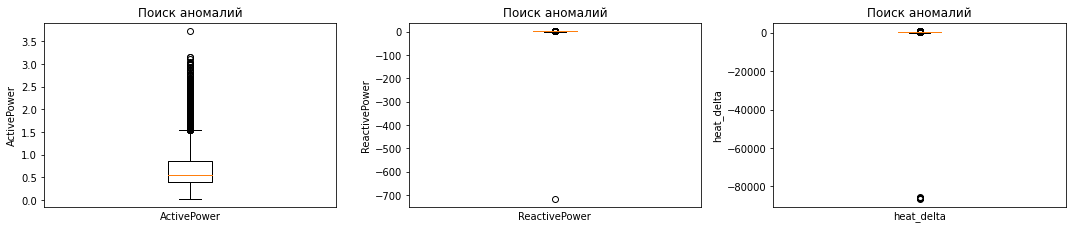

In [19]:
show_box_plots(data_arc,['ActivePower','ReactivePower','heat_delta'])


В глаза бросается большое количество аномалий, особенно по реактивной мощности и продолжительности нагрева. Посмотрим как бы выглядели эти графики без учёта аномалий. Попробуем, что будет если удалить всю партию с аномальным значением

In [20]:
sub=data_arc[data_arc['ReactivePower']<-100]
anomaly=sub['key'].unique().tolist()

In [21]:
sub=data_arc[data_arc['heat_delta']<0]
anomaly=anomaly+(sub['key'].unique().tolist())

In [22]:
data_arc = data_arc[~data_arc['key'].isin(anomaly)]

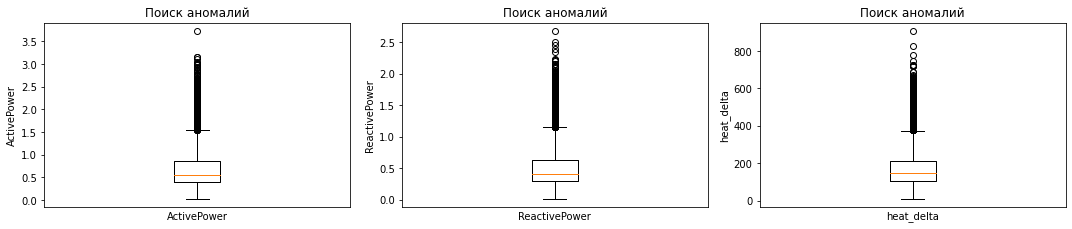

In [23]:
show_box_plots(data_arc,['ActivePower','ReactivePower','heat_delta'])

Так наши графики выгляд гораздо более гармонично, и здраво, с точки зрения металлургического смысла, реактивная мощность, как и вермя нагрева не должны быть отрицательными.

In [24]:
def show_hists(df, cols):
    z=len(cols)
    x=z//3+1
    y=3
    fig = plt.figure(figsize=(15,3*x))
    j = 1
    for i in cols:
        fig.add_subplot(x, y, j)
        plt.hist(df[i], bins=30, color='skyblue', edgecolor='black')
        plt.title("Распределение значений")
        plt.xlabel(i)
        plt.ylabel("Количество значений")
        plt.tight_layout()
        j = j + 1

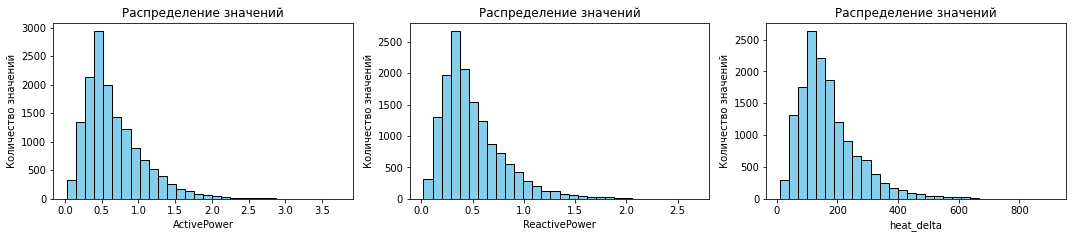

In [25]:
show_hists(data_arc,['ActivePower','ReactivePower','heat_delta'])

Теперь и распределение выглядит почти как нормальное, учитывая, что левых "хвост обрублен", так как исследуемые величины не бывают отрицательными.

In [26]:
#Cгенерируем новые признаки, которые могут пригодиться при обучении: 
#длительность нагрева, общую мощность, соотношение активной мощности к реактивной, количество запуска нагрева электродами.
data_arc['total_power']=data_arc['ActivePower']+data_arc['ReactivePower']
data_arc['power_sahre']=data_arc['ActivePower']/data_arc['ReactivePower']
data_arc['power_sahre']=data_arc['ActivePower']/data_arc['ReactivePower']

In [27]:
time_start_counts = data_arc.groupby('key')['BeginHeat'].count()
dictionary=time_start_counts.to_dict()
data_arc['heat_count'] = data_arc['key'].apply(lambda x: dictionary.get(x))
data_arc[data_arc['key']==1772]

,key,BeginHeat,EndHeat,ActivePower,ReactivePower,heat_delta,total_power,power_sahre,heat_count
8161,1772,1900-01-01 08:46:20,1900-01-01 08:48:31,0.431833,0.329767,131.0,0.761601,1.309508,4
8162,1772,1900-01-01 08:53:10,1900-01-01 08:57:57,1.051404,0.785352,287.0,1.836756,1.338768,4
8163,1772,1900-01-01 08:59:39,1900-01-01 09:02:23,0.641350,0.468861,164.0,1.110210,1.367889,4
8164,1772,1900-01-01 09:04:11,1900-01-01 09:05:47,0.368515,0.275144,96.0,0.643659,1.339350,4


In [28]:
#Теперь перед нами стоит задача так "сплющить" эту таблицу, чтобы на каждый ключ приходилась только одна строка
#пока для простоты возьмём медиану
data_arc = data_arc.groupby('key').median().reset_index()
data_arc.sample(5)


,key,ActivePower,ReactivePower,heat_delta,total_power,power_sahre,heat_count
2543,2587,0.737425,0.499678,169.0,1.237103,1.475799,5
2066,2099,0.480035,0.376490,127.0,0.856526,1.285196,3
697,715,1.085167,0.800574,251.0,1.885741,1.344965,3
1127,1150,0.522516,0.339252,121.0,0.861768,1.533210,5
247,252,1.069868,0.689217,243.0,1.869534,1.547256,4


## Данные об объёме сыпучих материалов

In [29]:
#Проверим наличие пропусков и аномалий, изучим распределение признаков.
data_bulk.isna().sum()

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

In [30]:
data_bulk.sample(3)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
1512,1570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463.0,NaN,349.0,205.0
2011,2082,NaN,NaN,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,434.0,NaN,227.0,NaN
2208,2288,NaN,NaN,NaN,NaN,132.0,NaN,NaN,NaN,NaN,NaN,NaN,156.0,NaN,150.0,54.0


Мы видим, что есть 15 типов сыпучих материалов, и в каждую партию идёт свой набор. Если есть пропуск, то данный материал в данную партию не добавляли.

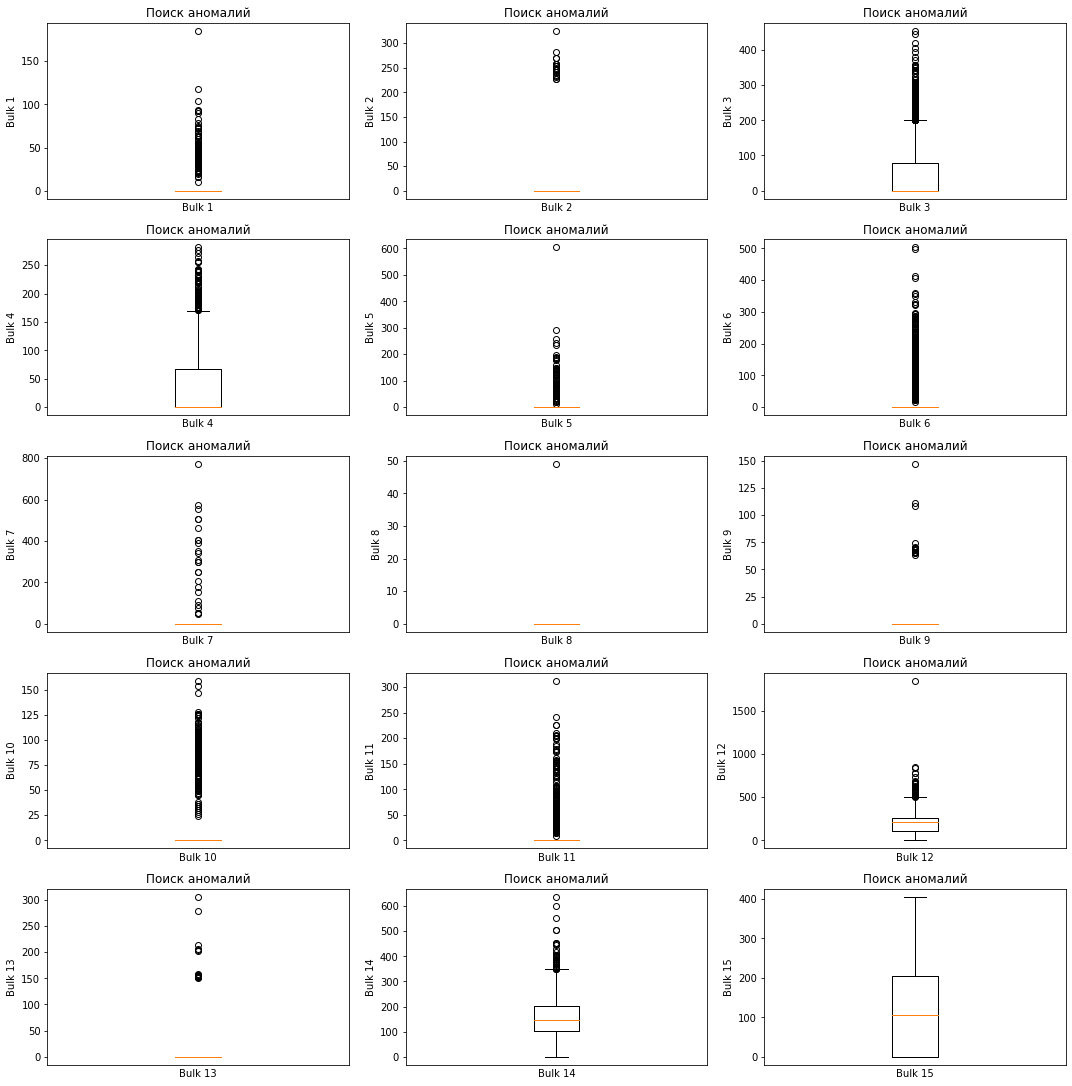

In [31]:
bulks=data_bulk.columns[1:]
filled_data_bulk=data_bulk.fillna(0)
show_box_plots(filled_data_bulk,bulks)

Видно, что не все сыпучие материалы одинаково используются. Некоторые сплошь состоят из аномалий (например, 8), т.е. добавляются от случая к случаю. Другие, как 15 используются достаточно стабильно.

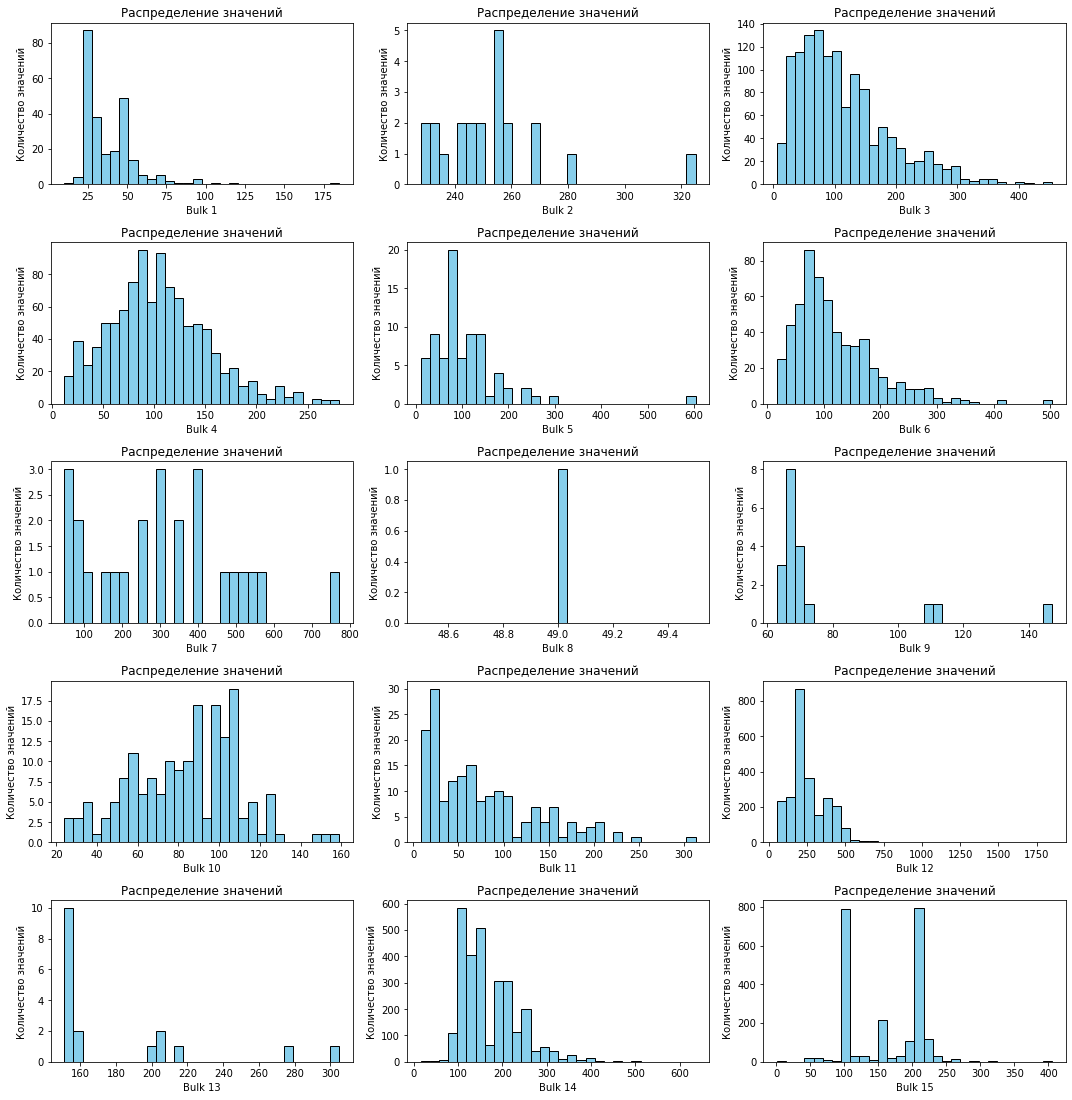

In [32]:
show_hists(data_bulk,bulks)

Распределния тоже очень разнообразные, при этом пока совершенно неясно что с ними делать. Удалять их опасно, данных и так не сказать чтоб очень много. Попробуем оставить как есть.

## Данные о времени подачи сыпучих материалов

In [33]:
#Проверим наличие пропусков и аномалий, изучим распределение признаков.
data_bulk_time.sample(5)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
1962,2029,None,None,20:43:44,None,None,20:30:34,None,None,None,None,20:30:34,20:14:28,None,20:14:28,20:14:28
2357,2441,None,None,01:26:18,None,None,None,None,None,None,None,None,01:14:46,None,01:14:46,01:14:46
1920,1985,None,None,None,04:00:04,None,None,None,None,None,None,None,03:54:59,None,03:54:59,03:54:59
404,429,None,None,None,07:12:38,None,None,None,None,None,None,None,07:03:47,None,07:03:47,07:03:47
1513,1567,None,None,None,None,None,20:30:13,None,None,None,None,None,None,None,20:21:39,None


In [34]:
data_bulk_time.isna().sum()

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

In [35]:
dbt=data_bulk_time
maxt = []
mint = []
for i in range(len(dbt)):
    maxt.append(pd.to_datetime(dbt.iloc[i].dropna()[1:].max(), format = '%H:%M:%S'))
    mint.append(pd.to_datetime(dbt.iloc[i].dropna()[1:].min(), format = '%H:%M:%S'))
dbt['bulk_time_max'] = maxt 
dbt['bulk_time_min'] = mint
dbt['bulk_time_delta']= dbt['bulk_time_max']-dbt['bulk_time_min']
dbt


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,bulk_time_max,bulk_time_min,bulk_time_delta
0,1,None,None,None,11:21:30,None,None,None,None,None,None,None,11:03:52,None,11:03:52,11:03:52,1900-01-01 11:21:30,1900-01-01 11:03:52,0 days 00:17:38
1,2,None,None,None,11:46:38,None,None,None,None,None,None,None,11:40:20,None,11:40:20,11:40:20,1900-01-01 11:46:38,1900-01-01 11:40:20,0 days 00:06:18
2,3,None,None,None,12:31:06,None,None,None,None,None,None,None,12:09:40,None,12:09:40,12:09:40,1900-01-01 12:31:06,1900-01-01 12:09:40,0 days 00:21:26
3,4,None,None,None,12:48:43,None,None,None,None,None,None,None,12:41:24,None,12:41:24,12:41:24,1900-01-01 12:48:43,1900-01-01 12:41:24,0 days 00:07:19
4,5,None,None,None,13:18:50,None,None,None,None,None,None,None,13:12:56,None,13:12:56,13:12:56,1900-01-01 13:18:50,1900-01-01 13:12:56,0 days 00:05:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,None,None,22:51:28,None,None,None,None,None,None,None,None,22:46:52,None,22:46:52,22:46:52,1900-01-01 22:51:28,1900-01-01 22:46:52,0 days 00:04:36
3125,3238,None,None,23:39:11,None,None,None,None,None,None,None,None,23:33:09,None,23:33:09,23:33:09,1900-01-01 23:39:11,1900-01-01 23:33:09,0 days 00:06:02
3126,3239,None,None,None,None,None,01:51:58,None,None,None,None,None,01:39:41,None,01:33:25,01:33:25,1900-01-01 01:51:58,1900-01-01 01:33:25,0 days 00:18:33
3127,3240,None,None,None,None,None,03:12:40,None,None,None,None,None,None,None,02:41:27,02:41:27,1900-01-01 03:12:40,1900-01-01 02:41:27,0 days 00:31:13


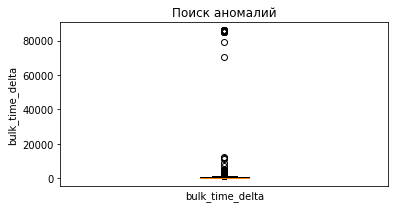

In [36]:
dbt['bulk_time_delta'] = dbt['bulk_time_delta'].apply(lambda x: x.total_seconds())
show_box_plots(dbt,['bulk_time_delta'])

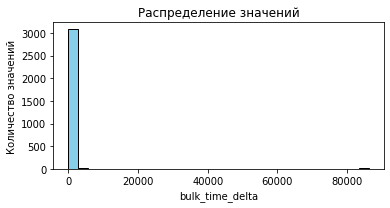

In [37]:
show_hists(dbt,['bulk_time_delta'])

Вот мы и выявили аномалию, где сыпучие вещества засыпаются около 22 часов. Учитывая, что это аномально-редкое явления, а ещё заказчик предупредил, что подобного не практикует, надо исключить эту аномалию.

In [38]:
#Исключим те партии, где вброс сыпучих компоненотов длилися экстремально долго
sub=dbt[dbt['bulk_time_delta']>20000]
anomaly=sub['key'].unique().tolist()
dbt = dbt[~dbt['key'].isin(anomaly)]

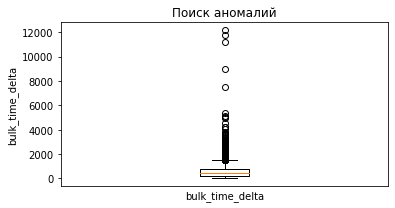

In [39]:
show_box_plots(dbt,['bulk_time_delta'])

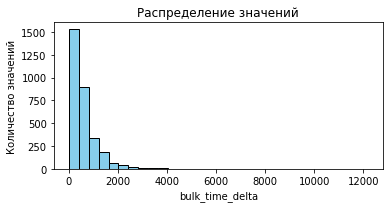

In [40]:
show_hists(dbt,['bulk_time_delta'])

Теперь наши аномалии выглядят не так пугающе и распределение уже похоже больше на половину нормального (с учётом того что вброс сыпучих компоненов всегда занимает какое-то время).

## Данные о продувке сплава газом

In [41]:
data_gas.sample(5)

,key,gas
723,726,18.411792
3070,3073,15.977581
865,868,6.461385
1910,1913,6.711119
1288,1291,11.996011


In [42]:
data_gas.isna().sum()

key    0
gas    0
dtype: int64

Пропусков нет. Заказчик подтвердил, что все партии продукваются инертным газом в обязательном порядке.

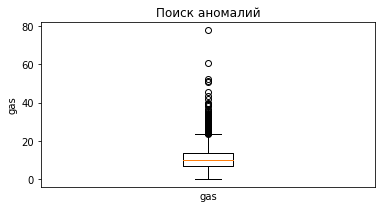

In [43]:
show_box_plots(data_gas,['gas'])

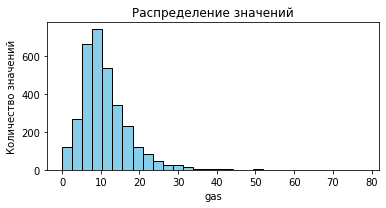

In [44]:
show_hists(data_gas,['gas'])

In [45]:
len(data_gas['key'].unique().tolist())

3239

In [46]:
sub=data_gas[data_gas['gas']>35]
anomaly=sub['key'].unique().tolist()
print("Количество партий в которых объём газа принимает аномальные значения", len(anomaly))

Количество партий в которых объём газа принимает аномальные значения 16


Мы видим, что есть небольшое число (менее 1%) партий у которых объём поданного газа принимает аномальные значения. Попробуем ими пожертатвовать.

In [47]:
data_gas = data_gas[~data_gas['key'].isin(anomaly)]

## Данные об измерениях температуры

In [48]:
data_temp.isna().sum()

key               0
MesaureTime       0
Temperature    2901
dtype: int64

In [49]:
meaures_max = data_temp.groupby('key')['MesaureTime'].last()
meaures_min = data_temp.groupby('key')['MesaureTime'].first()

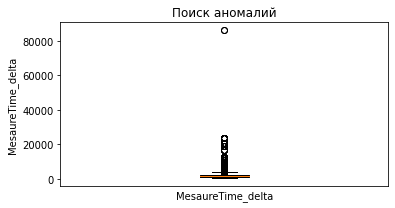

In [50]:
l1=[meaures_max,meaures_min]
l2=['meaures_max','meaures_min']
for i in range(len(l1)):
    dictionary=l1[i].to_dict()
    data_temp[l2[i]] = data_temp['key'].apply(lambda x: dictionary.get(x))
    data_temp[l2[i]] =pd.to_datetime(data_temp[l2[i]], format = '%H:%M:%S')

data_temp['MesaureTime_delta']= data_temp['meaures_max']-data_temp['meaures_min']
data_temp['MesaureTime_delta'] = data_temp['MesaureTime_delta'].apply(lambda x: x.total_seconds())
data_temp['MesaureTime_delta'] = data_temp['MesaureTime_delta'].apply(lambda x: x if x > 0 else x + (24*60*60))
show_box_plots(data_temp,['MesaureTime_delta'])

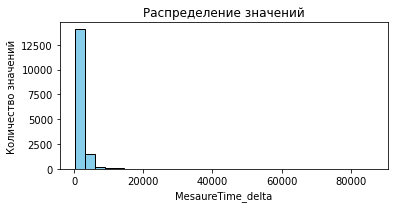

In [51]:
show_hists(data_temp,['MesaureTime_delta'])

In [52]:
sub=data_temp[data_temp['MesaureTime_delta']>20000]
anomaly=sub['key'].unique().tolist()
print("Количество партий в которых время нагрева партии принимает аномальные значения", len(anomaly))

Количество партий в которых время нагрева партии принимает аномальные значения 4


In [53]:
#Устаним эти аномалии
data_temp = data_temp[~data_temp['key'].isin(anomaly)]

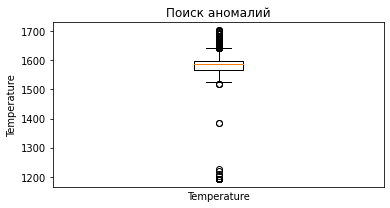

In [54]:
#Для нужд построения графика временно заменим пропуски на минимальные значения
fill=data_temp.fillna(min(data_temp['Temperature']))
show_box_plots(fill,['Temperature'])

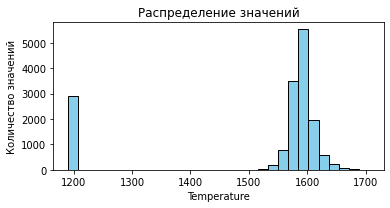

In [55]:
show_hists(fill,['Temperature'])

Заказчик предупредил, что значения температуры ниже 1500 градусов — аномальные. Также мы видели много пропусков значений температуры. Постараемся разобраться с ними. Сначала просто посмотрим как выглядят строки где температура не проставлена.

In [56]:
no_temp=data_temp[data_temp['Temperature'].isna()]
anm=list(no_temp['key'].unique())
len(anm)

739

In [57]:
data_temp.isna().sum()

key                     0
MesaureTime             0
Temperature          2901
meaures_max             0
meaures_min             0
MesaureTime_delta       0
dtype: int64

In [58]:
data_temp.head(20)

,key,MesaureTime,Temperature,meaures_max,meaures_min,MesaureTime_delta
0,1,11:16:18,1571.0,1900-01-01 11:30:39,1900-01-01 11:16:18,861.0
1,1,11:25:53,1604.0,1900-01-01 11:30:39,1900-01-01 11:16:18,861.0
2,1,11:29:11,1618.0,1900-01-01 11:30:39,1900-01-01 11:16:18,861.0
3,1,11:30:01,1601.0,1900-01-01 11:30:39,1900-01-01 11:16:18,861.0
4,1,11:30:39,1613.0,1900-01-01 11:30:39,1900-01-01 11:16:18,861.0
5,2,11:37:27,1581.0,1900-01-01 11:59:12,1900-01-01 11:37:27,1305.0
6,2,11:38:00,1577.0,1900-01-01 11:59:12,1900-01-01 11:37:27,1305.0
7,2,11:49:38,1589.0,1900-01-01 11:59:12,1900-01-01 11:37:27,1305.0
8,2,11:55:50,1604.0,1900-01-01 11:59:12,1900-01-01 11:37:27,1305.0
9,2,11:58:24,1608.0,1900-01-01 11:59:12,1900-01-01 11:37:27,1305.0


При агрегировании наблюдений используем только ключи, у которых как минимум два наблюдения: первый и последний замеры температуры.

In [59]:
min_time = {}
max_time = {}
min_temp = {}
max_temp = {}
for index, row in data_temp.iterrows():
    key = row['key']
    time = row['MesaureTime']
    temp = row['Temperature']
    # Обновление минимального значения
    if key not in min_time:
        min_time[key] = time
        min_temp[key]=temp
    else:
        if time < min_time[key]:
            min_time[key] = time
            min_temp[key] = temp
    # Обновление максимального значения
    if key not in max_time:
        max_time[key] = time
        max_temp[key] = temp
    else:
        if time > max_time[key]:
            max_time[key] = time
            max_temp[key] = temp
data_temp['start_temp'] = data_temp['key'].apply(lambda x: min_temp.get(x))
data_temp['final_temp'] = data_temp['key'].apply(lambda x: max_temp.get(x))
data_temp.sample(4)

,key,MesaureTime,Temperature,meaures_max,meaures_min,MesaureTime_delta,start_temp,final_temp
12164,2478,08:57:21,1564.0,1900-01-01 09:26:09,1900-01-01 08:57:21,1728.0,1564.0,1594.0
688,119,17:23:50,1628.0,1900-01-01 17:47:35,1900-01-01 17:23:50,1425.0,1628.0,1593.0
1815,334,21:44:18,1595.0,1900-01-01 21:57:49,1900-01-01 21:05:02,3167.0,1575.0,1596.0
2277,430,08:00:22,1593.0,1900-01-01 08:00:22,1900-01-01 07:45:33,889.0,1595.0,1593.0


In [60]:
data_temp.head(12)

,key,MesaureTime,Temperature,meaures_max,meaures_min,MesaureTime_delta,start_temp,final_temp
0,1,11:16:18,1571.0,1900-01-01 11:30:39,1900-01-01 11:16:18,861.0,1571.0,1613.0
1,1,11:25:53,1604.0,1900-01-01 11:30:39,1900-01-01 11:16:18,861.0,1571.0,1613.0
2,1,11:29:11,1618.0,1900-01-01 11:30:39,1900-01-01 11:16:18,861.0,1571.0,1613.0
3,1,11:30:01,1601.0,1900-01-01 11:30:39,1900-01-01 11:16:18,861.0,1571.0,1613.0
4,1,11:30:39,1613.0,1900-01-01 11:30:39,1900-01-01 11:16:18,861.0,1571.0,1613.0
5,2,11:37:27,1581.0,1900-01-01 11:59:12,1900-01-01 11:37:27,1305.0,1581.0,1602.0
6,2,11:38:00,1577.0,1900-01-01 11:59:12,1900-01-01 11:37:27,1305.0,1581.0,1602.0
7,2,11:49:38,1589.0,1900-01-01 11:59:12,1900-01-01 11:37:27,1305.0,1581.0,1602.0
8,2,11:55:50,1604.0,1900-01-01 11:59:12,1900-01-01 11:37:27,1305.0,1581.0,1602.0
9,2,11:58:24,1608.0,1900-01-01 11:59:12,1900-01-01 11:37:27,1305.0,1581.0,1602.0


In [61]:
anaconda=data_temp
anaconda=anaconda.dropna()
no_temp=anaconda[anaconda['Temperature']<1500]
anm=list(no_temp['key'].unique())
len(anm)


5

In [62]:
anmzz = anaconda[~anaconda['key'].isin(anm)]
cleaned_temp_data=anmzz.dropna()
cleaned_temp_data.sample(5)

,key,MesaureTime,Temperature,meaures_max,meaures_min,MesaureTime_delta,start_temp,final_temp
10615,2149,01:41:19,1576.0,1900-01-01 01:41:19,1900-01-01 00:51:46,2973.0,1574.0,1576.0
7823,1591,14:00:39,1586.0,1900-01-01 14:19:52,1900-01-01 13:43:03,2209.0,1585.0,1596.0
4766,950,13:45:14,1584.0,1900-01-01 13:45:14,1900-01-01 13:26:32,1122.0,1578.0,1584.0
6890,1396,16:54:24,1587.0,1900-01-01 17:02:08,1900-01-01 16:39:01,1387.0,1559.0,1596.0
8843,1806,13:27:51,1632.0,1900-01-01 14:01:16,1900-01-01 13:27:51,2005.0,1632.0,1606.0


In [63]:
cleaned_temp_data=cleaned_temp_data.groupby('key', as_index= False ). nth ( 0 )
cleaned_temp_data.head(5)

,key,MesaureTime,Temperature,meaures_max,meaures_min,MesaureTime_delta,start_temp,final_temp
0,1,11:16:18,1571.0,1900-01-01 11:30:39,1900-01-01 11:16:18,861.0,1571.0,1613.0
5,2,11:37:27,1581.0,1900-01-01 11:59:12,1900-01-01 11:37:27,1305.0,1581.0,1602.0
11,3,12:13:17,1596.0,1900-01-01 12:34:57,1900-01-01 12:13:17,1300.0,1596.0,1599.0
16,4,12:52:57,1601.0,1900-01-01 12:59:25,1900-01-01 12:52:57,388.0,1601.0,1625.0
19,5,13:23:19,1576.0,1900-01-01 13:36:01,1900-01-01 13:23:19,762.0,1576.0,1602.0


## Данные об объёме проволочных материалов

In [64]:
data_wire.isna().sum()

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

Мы видим, что есть 9 типов проволочных материалов, и в каждую партию идёт свой набор. Если есть пропуск, то данный материал в  партию не добавляли.

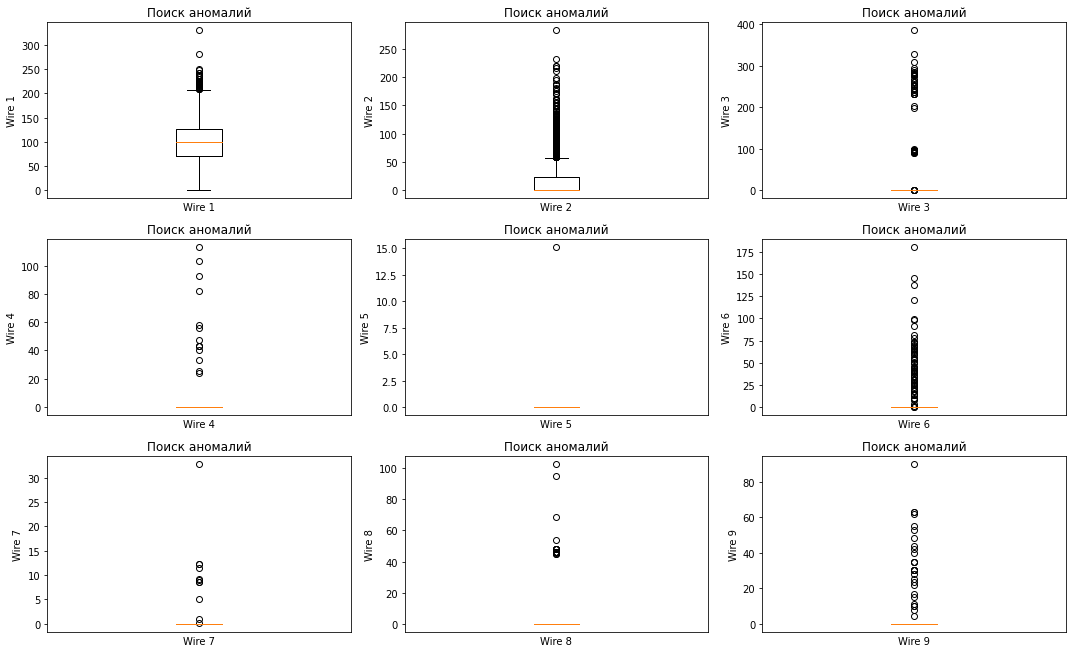

In [65]:
wires=data_wire.columns[1:]
filled_data_wire=data_wire.fillna(0)
show_box_plots(filled_data_wire,wires)

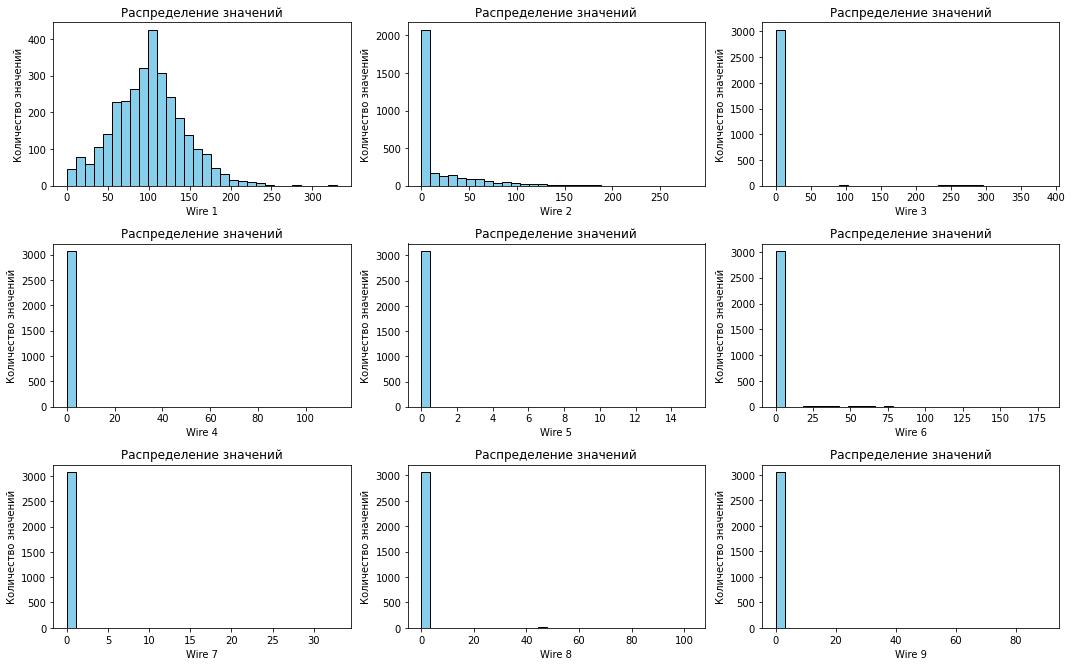

In [66]:
show_hists(filled_data_wire,wires)

Видно, что не все проволочные материалы одинаково используются. Некоторые сплошь состоят из аномалий (например, 5), т.е. добавляются от случая к случаю. Другие, как 1 используются достаточно стабильно.  
Распределния тоже очень разнообразные, при этом пока совершенно неясно что с ними делать. Удалять их опасно, данных и так не сказать чтоб очень много. Ограничимся тем, что заполним пропуски нулями.

## Данные о времени подачи проволочных материалов

In [67]:
data_wire_time.isna().sum()

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

In [68]:
dwt=data_wire_time
maxt = []
mint = []
for i in range(len(dwt)):
    maxt.append(pd.to_datetime(dwt.iloc[i].dropna()[1:].max(), format = '%H:%M:%S'))
    mint.append(pd.to_datetime(dwt.iloc[i].dropna()[1:].min(), format = '%H:%M:%S'))
dwt['wire_time_max'] = maxt 
dwt['wire_time_min'] = mint
dwt['wire_time_delta']= dwt['wire_time_max']-dwt['wire_time_min']
dwt.sample(4)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,wire_time_max,wire_time_min,wire_time_delta
2968,3127,11:47:29,None,None,None,None,None,None,None,None,1900-01-01 11:47:29,1900-01-01 11:47:29,0 days
953,1013,14:55:39,None,None,None,None,None,None,None,None,1900-01-01 14:55:39,1900-01-01 14:55:39,0 days
2712,2858,03:38:16,None,None,None,None,None,None,None,None,1900-01-01 03:38:16,1900-01-01 03:38:16,0 days
1376,1448,11:51:16,None,None,None,None,None,None,None,None,1900-01-01 11:51:16,1900-01-01 11:51:16,0 days


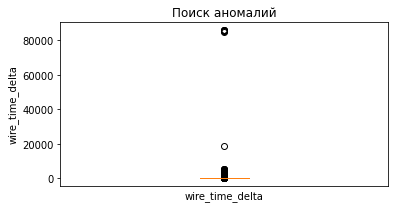

In [69]:
dwt['wire_time_delta'] = dwt['wire_time_delta'].apply(lambda x: x.total_seconds())
show_box_plots(dwt,['wire_time_delta'])

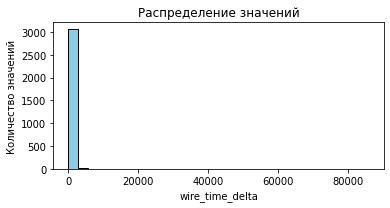

In [70]:
show_hists(dwt,['wire_time_delta'])

Наблюдаем небольшое количество аномалий, при которых процесс добавления проволочных материалов длиться почти сутки. Удалим эти аномалии.

In [71]:
#Исключим те партии, где вброс сыпучих компоненотов длилися экстремально долго
sub=dwt[dwt['wire_time_delta']>15000]
anomaly=sub['key'].unique().tolist()
dwt = dwt[~dwt['key'].isin(anomaly)]

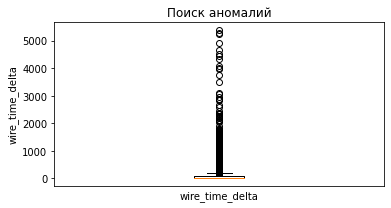

In [72]:
show_box_plots(dwt,['wire_time_delta'])

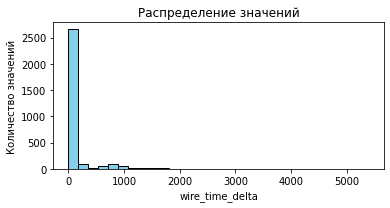

In [73]:
show_hists(dwt,['wire_time_delta'])

Теперь наши аномалии выглядят не так пугающе и распределение уже похоже больше на половину нормального (с учётом того что вброс проволочных материалов всегда занимает какое-то время).

**Вывод по результатм исследовательского анализа данных**  
1. Все таблицы содержат данные пригодные и важные для построения модели.  
2. Был проведёно анализ данных, в ходя которого выявлены и устранены аномалии, и большоая часть пропусков.
3. Пропуски не были удалены из таблиц по сыпучим и проволочным материалам. Так как это бы нарушило металлургическую логику процесса.
4. Абсолютные врменные данные были заменены на промежутки времени в секунадх, прошедших с начала измерения.
5. Данные по нагреву были агррегированы для каждой партии на оснвове медианных занчений.
6. Было обнаружено, что датчики крайне редко, но показывают температуру менее 1500 градусов, хотя по сведениям заказика, такого на производстве быть не может.

## Формирование надобра данных для моделирования

Объединим таблицы по ключу:  
1) Каждой партии должно соответствовать одно наблюдение.  
2) Во все партии точно добавлялись сыпучие и проволочные материалы, везде была выполнена продувка газом и сплав всегда нагревался.  
3) Заказчик предупредил, что иногда наблюдается асинхронность в заданном времени разных датчиков. Если вы будете выстраивать хронологию процессов для разных партий, то можете столкнуться с тем, что полученная хронология не соответствует хронологии в описании. Не стоит воспринимать это как ошибку.  

In [74]:
df=pd.merge(data_arc, filled_data_bulk, how='inner', left_on=['key'], right_on=['key'])
df=pd.merge(df, dbt, how='inner', left_on=['key'], right_on=['key'],suffixes=['_volume','_time'])
df=pd.merge(df, data_gas, how='inner', left_on=['key'], right_on=['key'])
df=pd.merge(df, cleaned_temp_data, how='inner', left_on=['key'], right_on=['key'])
df=pd.merge(df, filled_data_wire, how='inner', left_on=['key'], right_on=['key'])
df=pd.merge(df, dwt, how='inner', left_on=['key'], right_on=['key'],suffixes=['_volume','_time'])
df=df.set_index('key', inplace=False)
df.sample(5)

,ActivePower,ReactivePower,heat_delta,total_power,power_sahre,heat_count,Bulk 1_volume,Bulk 2_volume,Bulk 3_volume,Bulk 4_volume,...,Wire 3_time,Wire 4_time,Wire 5_time,Wire 6_time,Wire 7_time,Wire 8_time,Wire 9_time,wire_time_max,wire_time_min,wire_time_delta
key,,,,,,,,,,,,,,,,,,,,,
1056,0.464267,0.296630,135.5,0.760897,1.554673,4,0.0,0.0,0.0,138.0,...,None,None,None,None,None,None,None,1900-01-01 00:20:09,1900-01-01 00:20:09,0.0
1755,0.713190,0.551910,187.0,1.265100,1.254396,7,0.0,0.0,206.0,0.0,...,None,None,None,None,None,None,None,1900-01-01 19:41:36,1900-01-01 19:20:22,1274.0
1232,0.355377,0.253943,101.0,0.609320,1.405451,3,0.0,0.0,0.0,90.0,...,None,None,None,None,None,None,None,1900-01-01 21:20:17,1900-01-01 21:09:04,673.0
1143,0.460946,0.352322,114.5,0.813268,1.269825,6,0.0,0.0,0.0,77.0,...,None,None,None,None,None,None,None,1900-01-01 01:03:07,1900-01-01 01:03:07,0.0
977,0.186226,0.189841,57.0,0.376067,0.980955,1,0.0,0.0,70.0,0.0,...,None,None,None,None,None,None,None,1900-01-01 06:16:02,1900-01-01 06:14:07,115.0


In [75]:
df.tail(10)

,ActivePower,ReactivePower,heat_delta,total_power,power_sahre,heat_count,Bulk 1_volume,Bulk 2_volume,Bulk 3_volume,Bulk 4_volume,...,Wire 3_time,Wire 4_time,Wire 5_time,Wire 6_time,Wire 7_time,Wire 8_time,Wire 9_time,wire_time_max,wire_time_min,wire_time_delta
key,,,,,,,,,,,,,,,,,,,,,
2489,0.509670,0.500802,154.0,1.010473,1.030254,2,0.0,0.0,0.0,0.0,...,None,None,None,None,None,None,None,1900-01-01 20:38:32,1900-01-01 20:38:32,0.0
2490,0.681973,0.474997,153.0,1.156970,1.435741,5,0.0,0.0,50.0,116.0,...,None,None,None,None,None,None,None,1900-01-01 22:06:31,1900-01-01 22:06:31,0.0
2492,0.783357,0.514980,175.0,1.298337,1.324323,3,0.0,0.0,74.0,198.0,...,None,None,None,None,None,None,None,1900-01-01 22:44:06,1900-01-01 22:44:06,0.0
2493,0.599561,0.427979,138.0,1.027540,1.400912,3,0.0,0.0,115.0,105.0,...,None,None,None,None,None,None,None,1900-01-01 23:36:40,1900-01-01 23:36:40,0.0
2494,0.839425,0.574254,182.0,1.413679,1.461766,3,0.0,0.0,0.0,162.0,...,None,None,None,None,None,None,None,1900-01-01 00:12:37,1900-01-01 00:12:37,0.0
2495,0.856645,0.643309,195.0,1.499954,1.404148,4,0.0,0.0,21.0,0.0,...,None,None,None,None,None,None,None,1900-01-01 00:36:13,1900-01-01 00:36:13,0.0
2496,0.622022,0.424336,139.0,1.046358,1.512999,6,0.0,0.0,0.0,63.0,...,None,None,None,None,None,None,None,1900-01-01 01:13:33,1900-01-01 01:13:33,0.0
2497,0.796857,0.645539,206.0,1.442397,1.190128,3,0.0,0.0,0.0,85.0,...,None,None,None,None,None,None,None,1900-01-01 01:42:51,1900-01-01 01:42:27,24.0
2498,0.598447,0.412770,133.0,1.011218,1.473555,5,0.0,0.0,90.0,0.0,...,None,None,None,None,None,None,None,1900-01-01 02:04:20,1900-01-01 02:04:20,0.0


In [76]:
len(df.index.unique())

2278

Конкретное время внесение сыпучих и проволочных компонентов напрямую не должно влиять на температуру. Скорее будет влиять количество секунд прошедшее от начала варки до момента внесения компонента.

In [77]:
#Создадим списки колонок со временем внесения компонентов
collist1=['Bulk 1_time',
       'Bulk 2_time', 'Bulk 3_time', 'Bulk 4_time', 'Bulk 5_time',
       'Bulk 6_time', 'Bulk 7_time', 'Bulk 8_time', 'Bulk 9_time',
       'Bulk 10_time', 'Bulk 11_time', 'Bulk 12_time', 'Bulk 13_time',
       'Bulk 14_time', 'Bulk 15_time']
collist2=['Wire 1_time', 'Wire 2_time', 'Wire 3_time',
       'Wire 4_time', 'Wire 5_time', 'Wire 6_time', 'Wire 7_time',
       'Wire 8_time', 'Wire 9_time']
#Пройдёмся по спискам колонок
for i in range(max(len(collist1),len(collist2))):
    #Из времени внесения каждого сыпучего материала вычтем минимальное время внесения
    if  i < len(collist1):
        x = pd.to_datetime(df[collist1[i]], format = '%H:%M:%S')
        x = x - df['bulk_time_min']
        #Переведём результат в количество секунд
        x = x.apply(lambda x: x.total_seconds())
        #Заменим значение в соответствующем столбце в нашем наборе данных
        df[collist1[i]] = x
        #x=x.fillna(0)
    #Проверим, не вылетает ли цикл за количество колонок в списке
    if i < len(collist2):
        #Из времени внесения каждого *проволочного* материала вычтем минимальное время внесения
        x = pd.to_datetime(df[collist2[i]], format = '%H:%M:%S')
        x = x - df['wire_time_min']
        #Переведём результат в количество секунд
        x = x.apply(lambda x: x.total_seconds())
        #Заменим значение в соответствующем столбце в нашем наборе данных
        df[collist2[i]] = x




## Исследовательский анализ данных объединённой таблицы

In [78]:
#Сначала ещё раз посмотрим что у нас за набор данных
display(df.sample(5))

,ActivePower,ReactivePower,heat_delta,total_power,power_sahre,heat_count,Bulk 1_volume,Bulk 2_volume,Bulk 3_volume,Bulk 4_volume,...,Wire 3_time,Wire 4_time,Wire 5_time,Wire 6_time,Wire 7_time,Wire 8_time,Wire 9_time,wire_time_max,wire_time_min,wire_time_delta
key,,,,,,,,,,,,,,,,,,,,,
1017,1.126995,0.689056,244.0,1.816052,1.517399,5,0.0,0.0,0.0,239.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 17:38:34,1900-01-01 17:38:34,0.0
781,0.414400,0.273979,127.0,0.688379,1.537125,5,0.0,0.0,55.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 09:24:57,1900-01-01 09:22:29,148.0
1805,0.657673,0.479930,151.0,1.137603,1.273365,5,0.0,0.0,0.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 11:40:21,1900-01-01 11:40:21,0.0
2070,0.582125,0.441451,146.0,1.037615,1.360544,4,0.0,0.0,119.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 06:56:18,1900-01-01 06:55:02,76.0
1156,0.465912,0.330851,138.5,0.796763,1.335923,4,0.0,0.0,0.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 10:42:21,1900-01-01 10:42:21,0.0


In [79]:
print(df.shape)

(2278, 68)


11 тыс. записей - должно быть достаточно для обучения модели. И признаков много, но не безумно много, чтобы модель обучалась слишком долго.

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 1 to 2499
Data columns (total 68 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ActivePower        2278 non-null   float64       
 1   ReactivePower      2278 non-null   float64       
 2   heat_delta         2278 non-null   float64       
 3   total_power        2278 non-null   float64       
 4   power_sahre        2278 non-null   float64       
 5   heat_count         2278 non-null   int64         
 6   Bulk 1_volume      2278 non-null   float64       
 7   Bulk 2_volume      2278 non-null   float64       
 8   Bulk 3_volume      2278 non-null   float64       
 9   Bulk 4_volume      2278 non-null   float64       
 10  Bulk 5_volume      2278 non-null   float64       
 11  Bulk 6_volume      2278 non-null   float64       
 12  Bulk 7_volume      2278 non-null   float64       
 13  Bulk 8_volume      2278 non-null   float64       
 14  Bulk 9_v

У нас остались колонки с типом datetime64[ns], так как перед нами не стоит задача анализа временных рядов, мы попробуем их исключить.

In [81]:
df=df.drop(['wire_time_max','wire_time_min','meaures_max','meaures_min','bulk_time_min','bulk_time_max','MesaureTime'],axis=1)

,ReactivePower,heat_delta,total_power,power_sahre,heat_count,Bulk 1_volume,Bulk 2_volume,Bulk 3_volume,Bulk 4_volume,Bulk 5_volume
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.00000,2278.000000,2278.000000,2278.000000
mean,0.451409,156.944908,1.063714,1.375560,4.665935,3.267779,0.97410,47.226953,37.241879,2.362160
std,0.152355,44.917007,0.349847,0.144560,1.541232,11.667639,15.50074,75.121186,58.716710,21.599727
min,0.086818,43.000000,0.220220,0.591452,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.341223,126.000000,0.809832,1.301549,4.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.431615,152.000000,1.014878,1.388283,5.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.539697,184.000000,1.268600,1.467880,6.000000,0.000000,0.00000,79.000000,77.000000,0.000000
max,1.290548,421.000000,2.922665,1.894052,13.000000,94.000000,282.00000,454.000000,281.000000,603.000000


Пропуски в данных:


ReactivePower    0
heat_delta       0
total_power      0
power_sahre      0
heat_count       0
Bulk 1_volume    0
Bulk 2_volume    0
Bulk 3_volume    0
Bulk 4_volume    0
Bulk 5_volume    0
dtype: int64

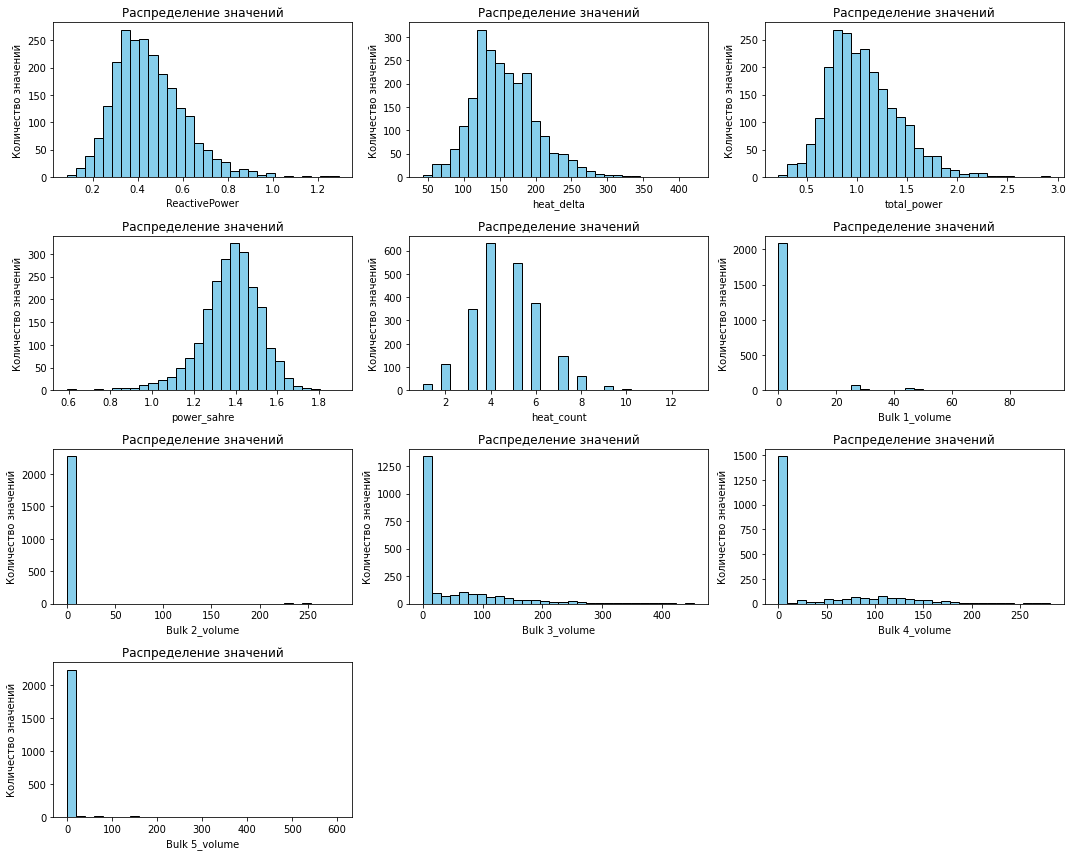

***********************************************


,Bulk 6_volume,Bulk 7_volume,Bulk 8_volume,Bulk 9_volume,Bulk 10_volume,Bulk 11_volume,Bulk 12_volume,Bulk 13_volume,Bulk 14_volume,Bulk 15_volume
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,22.200615,1.471027,0.021510,0.427129,5.165935,4.146181,207.304214,0.755487,153.560140,120.208077
std,55.383643,26.584537,1.026642,6.151413,21.136934,21.992955,152.518829,11.659283,80.379303,84.581351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,0.000000,105.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,0.000000,149.000000,107.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,281.000000,0.000000,204.000000,204.000000
max,503.000000,772.000000,49.000000,147.000000,159.000000,313.000000,853.000000,278.000000,450.000000,405.000000


Пропуски в данных:


Bulk 6_volume     0
Bulk 7_volume     0
Bulk 8_volume     0
Bulk 9_volume     0
Bulk 10_volume    0
Bulk 11_volume    0
Bulk 12_volume    0
Bulk 13_volume    0
Bulk 14_volume    0
Bulk 15_volume    0
dtype: int64

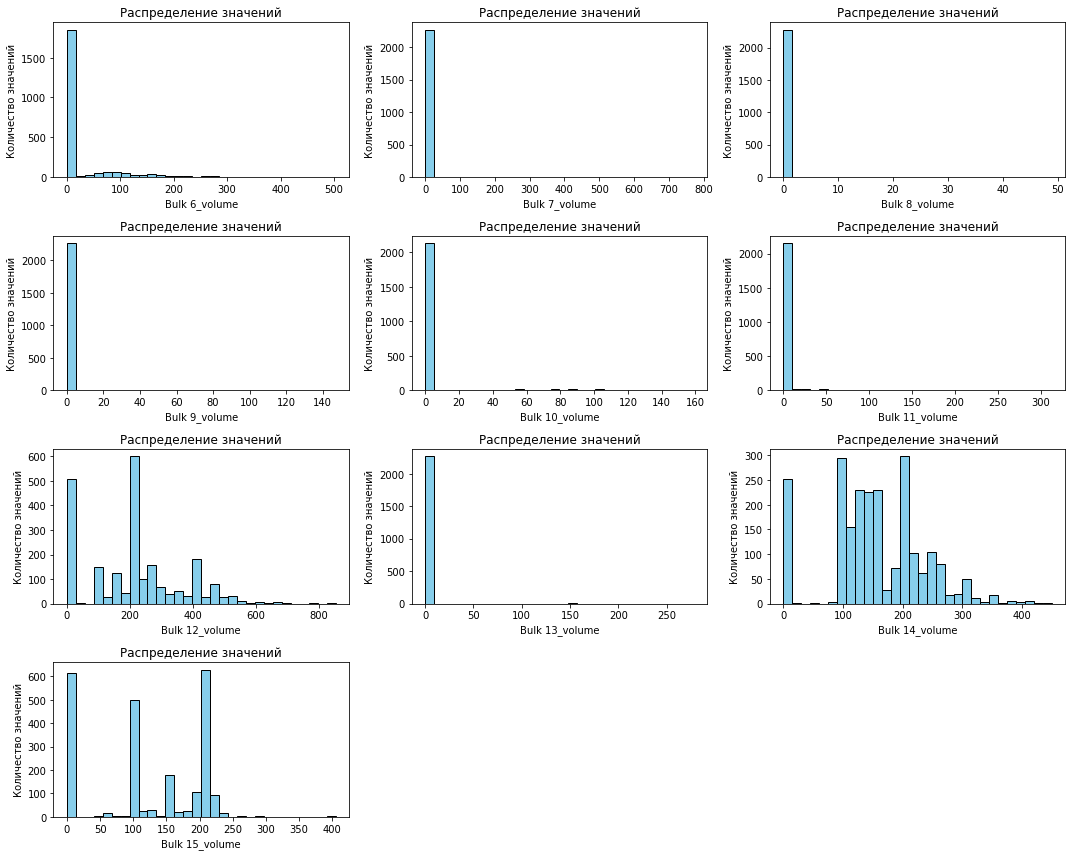

***********************************************


,Bulk 1_time,Bulk 2_time,Bulk 3_time,Bulk 4_time,Bulk 5_time,Bulk 6_time,Bulk 7_time,Bulk 8_time,Bulk 9_time,Bulk 10_time
count,190.000000,9.000000,941.000000,791.000000,46.000000,426.000000,10.000000,1.0,12.000000,143.000000
mean,320.384211,193.888889,656.552604,596.878635,595.956522,643.070423,224.100000,1156.0,1194.166667,662.895105
std,318.802463,239.841846,696.761627,530.566070,538.459364,610.997248,290.134241,NaN,406.758547,648.351026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1156.0,804.000000,0.000000
25%,23.000000,0.000000,317.000000,310.500000,273.500000,309.000000,0.000000,1156.0,970.750000,330.500000
50%,300.500000,173.000000,484.000000,454.000000,379.500000,440.000000,172.000000,1156.0,1025.000000,471.000000
75%,439.000000,217.000000,822.000000,754.000000,772.000000,777.500000,213.250000,1156.0,1220.750000,814.500000
max,2000.000000,781.000000,12201.000000,3838.000000,2474.000000,5348.000000,781.000000,1156.0,2036.000000,4216.000000


Пропуски в данных:


Bulk 1_time     2088
Bulk 2_time     2269
Bulk 3_time     1337
Bulk 4_time     1487
Bulk 5_time     2232
Bulk 6_time     1852
Bulk 7_time     2268
Bulk 8_time     2277
Bulk 9_time     2266
Bulk 10_time    2135
dtype: int64

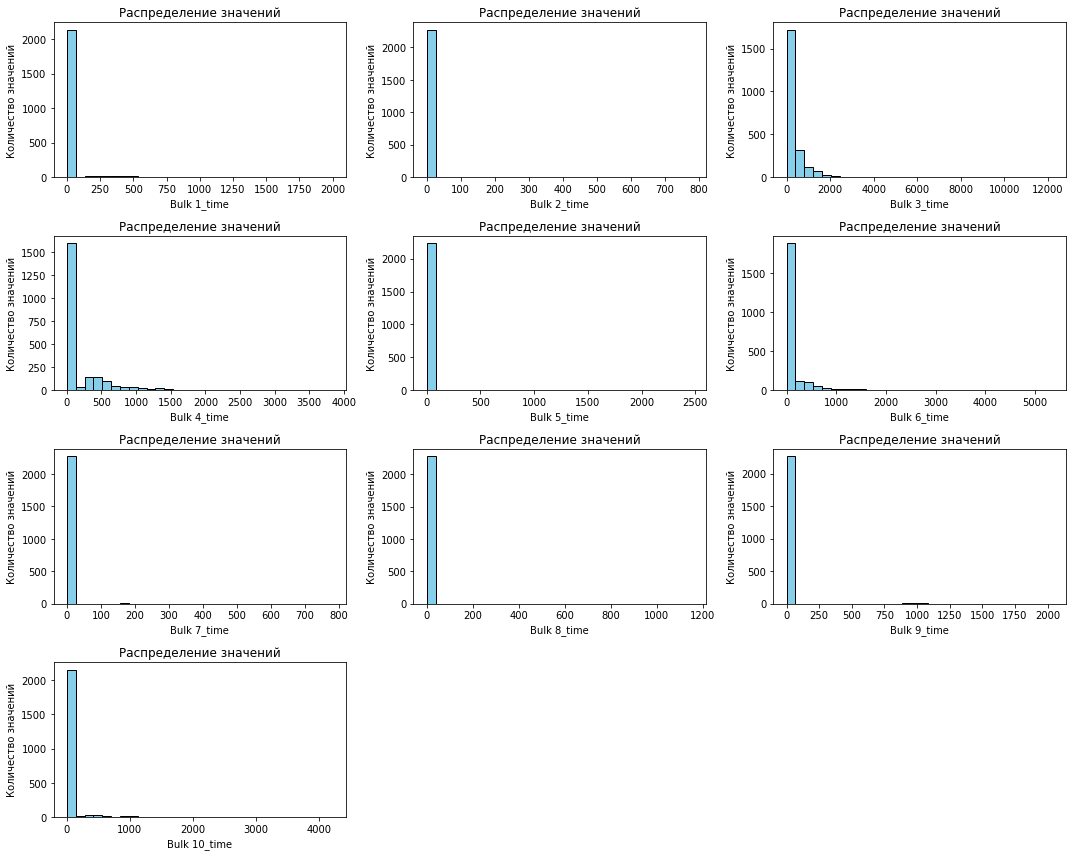

***********************************************


,Bulk 11_time,Bulk 12_time,Bulk 13_time,Bulk 14_time,Bulk 15_time,bulk_time_delta,gas,Temperature,MesaureTime_delta,start_temp
count,126.000000,1772.000000,10.000000,2026.000000,1665.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,649.182540,19.845937,182.400000,4.411155,22.701502,567.289289,11.147982,1587.289289,1851.798068,1587.223442
std,467.730528,130.121354,576.799445,78.704832,305.077148,625.709446,5.739844,23.530658,1070.893220,23.452727
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008399,1519.000000,234.000000,1519.000000
25%,325.500000,0.000000,0.000000,0.000000,0.000000,233.000000,7.250321,1571.000000,1210.250000,1571.000000
50%,477.500000,0.000000,0.000000,0.000000,0.000000,417.000000,10.032503,1587.000000,1628.500000,1587.000000
75%,883.500000,0.000000,0.000000,0.000000,0.000000,742.000000,14.120405,1603.000000,2273.750000,1603.000000
max,2560.000000,2629.000000,1824.000000,2699.000000,11394.000000,12201.000000,34.827057,1660.000000,18948.000000,1660.000000


Пропуски в данных:


Bulk 11_time         2152
Bulk 12_time          506
Bulk 13_time         2268
Bulk 14_time          252
Bulk 15_time          613
bulk_time_delta         0
gas                     0
Temperature             0
MesaureTime_delta       0
start_temp              0
dtype: int64

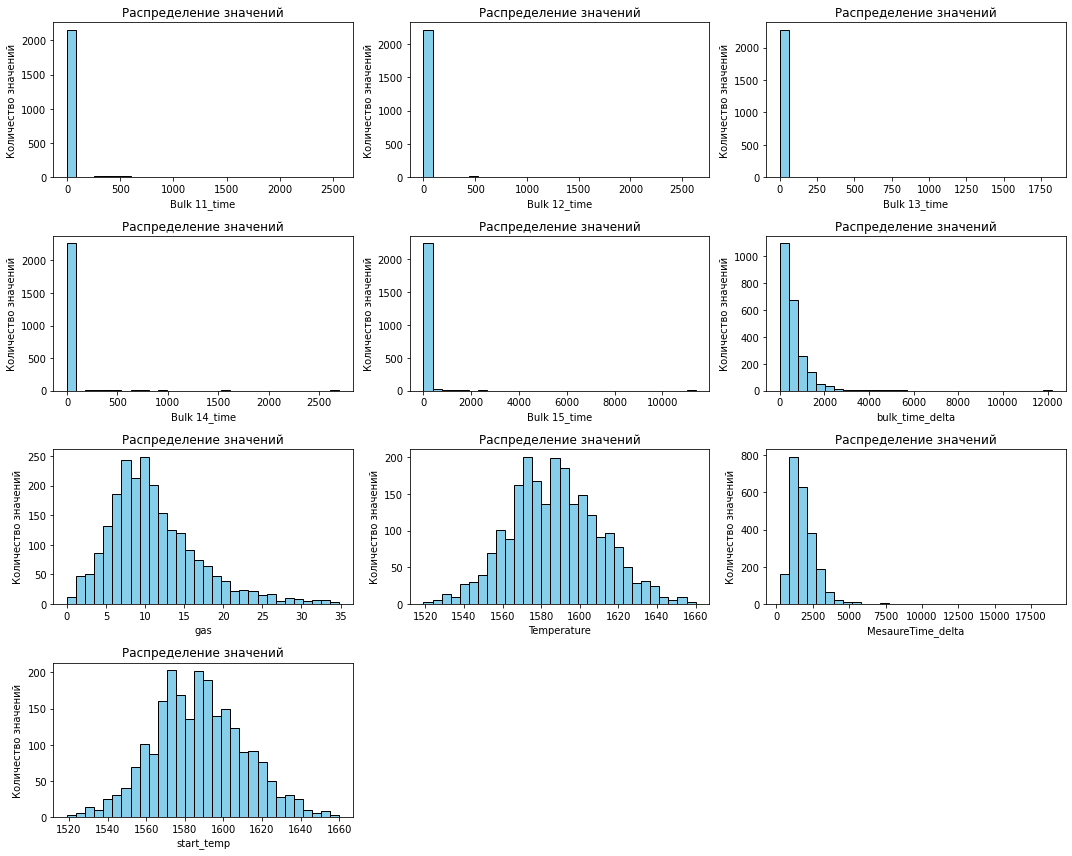

***********************************************


,final_temp,Wire 1_volume,Wire 2_volume,Wire 3_volume,Wire 4_volume,Wire 5_volume,Wire 6_volume,Wire 7_volume,Wire 8_volume,Wire 9_volume
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.0,2278.000000,2278.000000,2278.000000,2278.000000
mean,1593.305970,102.401765,17.655287,3.142968,0.233592,0.0,0.894731,0.005937,0.298086,0.324212
std,11.196291,43.083658,33.616657,27.994979,4.190057,0.0,8.374156,0.206776,4.347279,3.494727
min,1538.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1587.000000,74.037598,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1593.000000,101.119202,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1598.000000,127.342803,23.145980,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1653.000000,330.314424,282.780152,385.008668,113.231044,0.0,180.454575,8.490040,102.762401,62.025600


Пропуски в данных:


final_temp       0
Wire 1_volume    0
Wire 2_volume    0
Wire 3_volume    0
Wire 4_volume    0
Wire 5_volume    0
Wire 6_volume    0
Wire 7_volume    0
Wire 8_volume    0
Wire 9_volume    0
dtype: int64

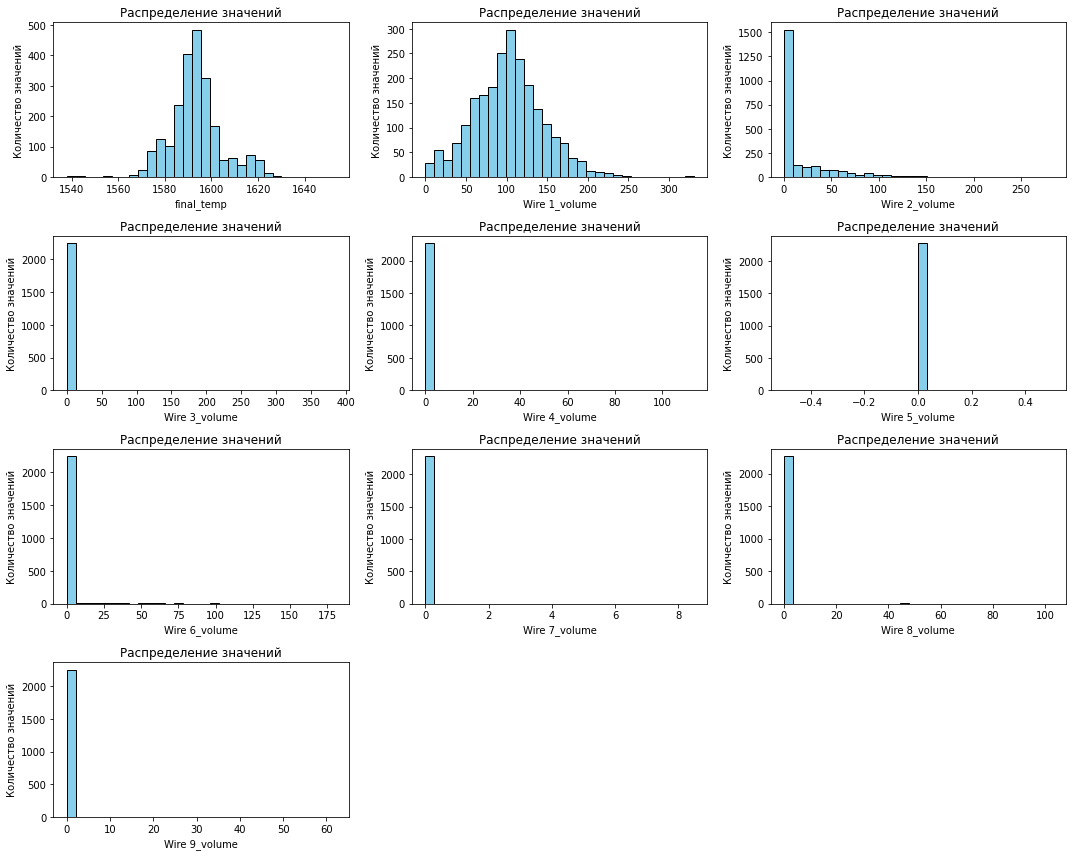

***********************************************


,Wire 1_time,Wire 2_time,Wire 3_time,Wire 4_time,Wire 5_time,Wire 6_time,Wire 7_time,Wire 8_time,Wire 9_time,wire_time_delta
count,2258.00000,797.000000,35.000000,9.000000,0.0,41.000000,2.000000,12.000000,24.000000,2278.000000
mean,9.94907,303.749059,1138.314286,242.555556,NaN,283.121951,3170.500000,908.666667,208.541667,135.881914
std,149.78349,473.513492,905.737911,273.098476,NaN,676.109281,3144.503856,528.186319,305.056086,391.805519
min,0.00000,0.000000,0.000000,0.000000,NaN,0.000000,947.000000,574.000000,0.000000,0.000000
25%,0.00000,61.000000,382.500000,47.000000,NaN,1.000000,2058.750000,627.000000,61.000000,0.000000
50%,0.00000,100.000000,1141.000000,161.000000,NaN,74.000000,3170.500000,667.000000,155.500000,0.000000
75%,0.00000,248.000000,1482.000000,305.000000,NaN,114.000000,4282.250000,871.750000,223.250000,79.000000
max,5238.00000,5271.000000,3770.000000,835.000000,NaN,3973.000000,5394.000000,2361.000000,1531.000000,5394.000000


Пропуски в данных:


Wire 1_time          20
Wire 2_time        1481
Wire 3_time        2243
Wire 4_time        2269
Wire 5_time        2278
Wire 6_time        2237
Wire 7_time        2276
Wire 8_time        2266
Wire 9_time        2254
wire_time_delta       0
dtype: int64

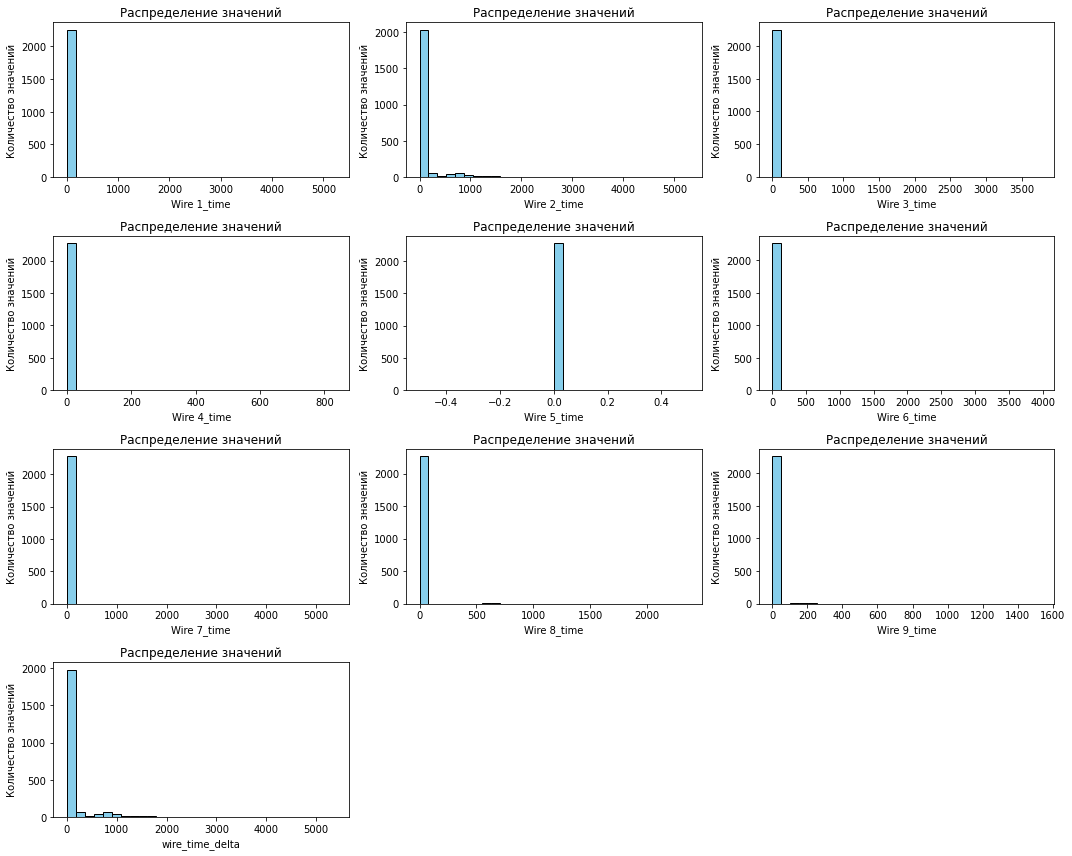

***********************************************


In [82]:
cols=df.columns[1:]
for i in range(6):
    slice=cols[i*10:i*10+10]
    display(df[slice].describe())
    print('Пропуски в данных:')
    display(df[slice].isnull().sum())
    show_hists(df.fillna(0),slice)
    plt.show()
    print('***********************************************')



*Выводы*  
1. В основном наши данные имеют логичные распределения и не имеют пропусков.  
2. Исключения составляют данные связанные с внеменимем сыпучих и проволочных материалов, что опять-таки отражает специфику производства и не грешит против логики.  
3. Значения из колонки Temperature мы не будем использовать, чтобы избежать утечки целевого признака.  
4. Значение final_temp - будет нашей целевой переменной, которую модель должна будет предсказывать.

In [83]:
df=df.drop(['Temperature'],axis=1)

In [84]:
df.columns

Index(['ActivePower', 'ReactivePower', 'heat_delta', 'total_power',
       'power_sahre', 'heat_count', 'Bulk 1_volume', 'Bulk 2_volume',
       'Bulk 3_volume', 'Bulk 4_volume', 'Bulk 5_volume', 'Bulk 6_volume',
       'Bulk 7_volume', 'Bulk 8_volume', 'Bulk 9_volume', 'Bulk 10_volume',
       'Bulk 11_volume', 'Bulk 12_volume', 'Bulk 13_volume', 'Bulk 14_volume',
       'Bulk 15_volume', 'Bulk 1_time', 'Bulk 2_time', 'Bulk 3_time',
       'Bulk 4_time', 'Bulk 5_time', 'Bulk 6_time', 'Bulk 7_time',
       'Bulk 8_time', 'Bulk 9_time', 'Bulk 10_time', 'Bulk 11_time',
       'Bulk 12_time', 'Bulk 13_time', 'Bulk 14_time', 'Bulk 15_time',
       'bulk_time_delta', 'gas', 'MesaureTime_delta', 'start_temp',
       'final_temp', 'Wire 1_volume', 'Wire 2_volume', 'Wire 3_volume',
       'Wire 4_volume', 'Wire 5_volume', 'Wire 6_volume', 'Wire 7_volume',
       'Wire 8_volume', 'Wire 9_volume', 'Wire 1_time', 'Wire 2_time',
       'Wire 3_time', 'Wire 4_time', 'Wire 5_time', 'Wire 6_time',
  

In [85]:
#Корреляционный анализ будем проводить только по показателям не связанным с добавлением сыпучих и проволочных материалов
corr_cols=['ActivePower', 'ReactivePower', 'heat_delta', 'total_power',
       'power_sahre', 'heat_count', 'bulk_time_delta', 'gas', 'MesaureTime_delta', 'start_temp',
       'final_temp', 'wire_time_delta']
corr = df[corr_cols].corr()
corr.style.background_gradient(cmap='coolwarm')

,ActivePower,ReactivePower,heat_delta,total_power,power_sahre,heat_count,bulk_time_delta,gas,MesaureTime_delta,start_temp,final_temp,wire_time_delta
ActivePower,1.000000,0.911663,0.940669,0.982882,0.123698,-0.078850,0.058441,0.033148,-0.029484,-0.417319,0.146096,-0.050370
ReactivePower,0.911663,1.000000,0.923429,0.970123,-0.213902,-0.083112,0.032405,-0.001678,-0.025930,-0.379157,0.087253,-0.036777
heat_delta,0.940669,0.923429,1.000000,0.954513,-0.001253,-0.118292,0.049155,0.023745,-0.023430,-0.344073,0.115051,-0.044803
total_power,0.982882,0.970123,0.954513,1.000000,-0.022265,-0.082859,0.047159,0.018730,-0.027236,-0.406234,0.122876,-0.045662
power_sahre,0.123698,-0.213902,-0.001253,-0.022265,1.000000,0.102824,0.095604,0.117507,0.040145,-0.096340,0.170543,0.010166
heat_count,-0.078850,-0.083112,-0.118292,-0.082859,0.102824,1.000000,0.396834,0.371665,0.574444,-0.196039,0.181228,0.132363
bulk_time_delta,0.058441,0.032405,0.049155,0.047159,0.095604,0.396834,1.000000,0.308054,0.499670,0.018627,0.057230,0.142742
gas,0.033148,-0.001678,0.023745,0.018730,0.117507,0.371665,0.308054,1.000000,0.430124,0.016758,0.070317,0.147260
MesaureTime_delta,-0.029484,-0.025930,-0.023430,-0.027236,0.040145,0.574444,0.499670,0.430124,1.000000,0.217935,0.137207,0.220280
start_temp,-0.417319,-0.379157,-0.344073,-0.406234,-0.096340,-0.196039,0.018627,0.016758,0.217935,1.000000,0.315167,0.070106


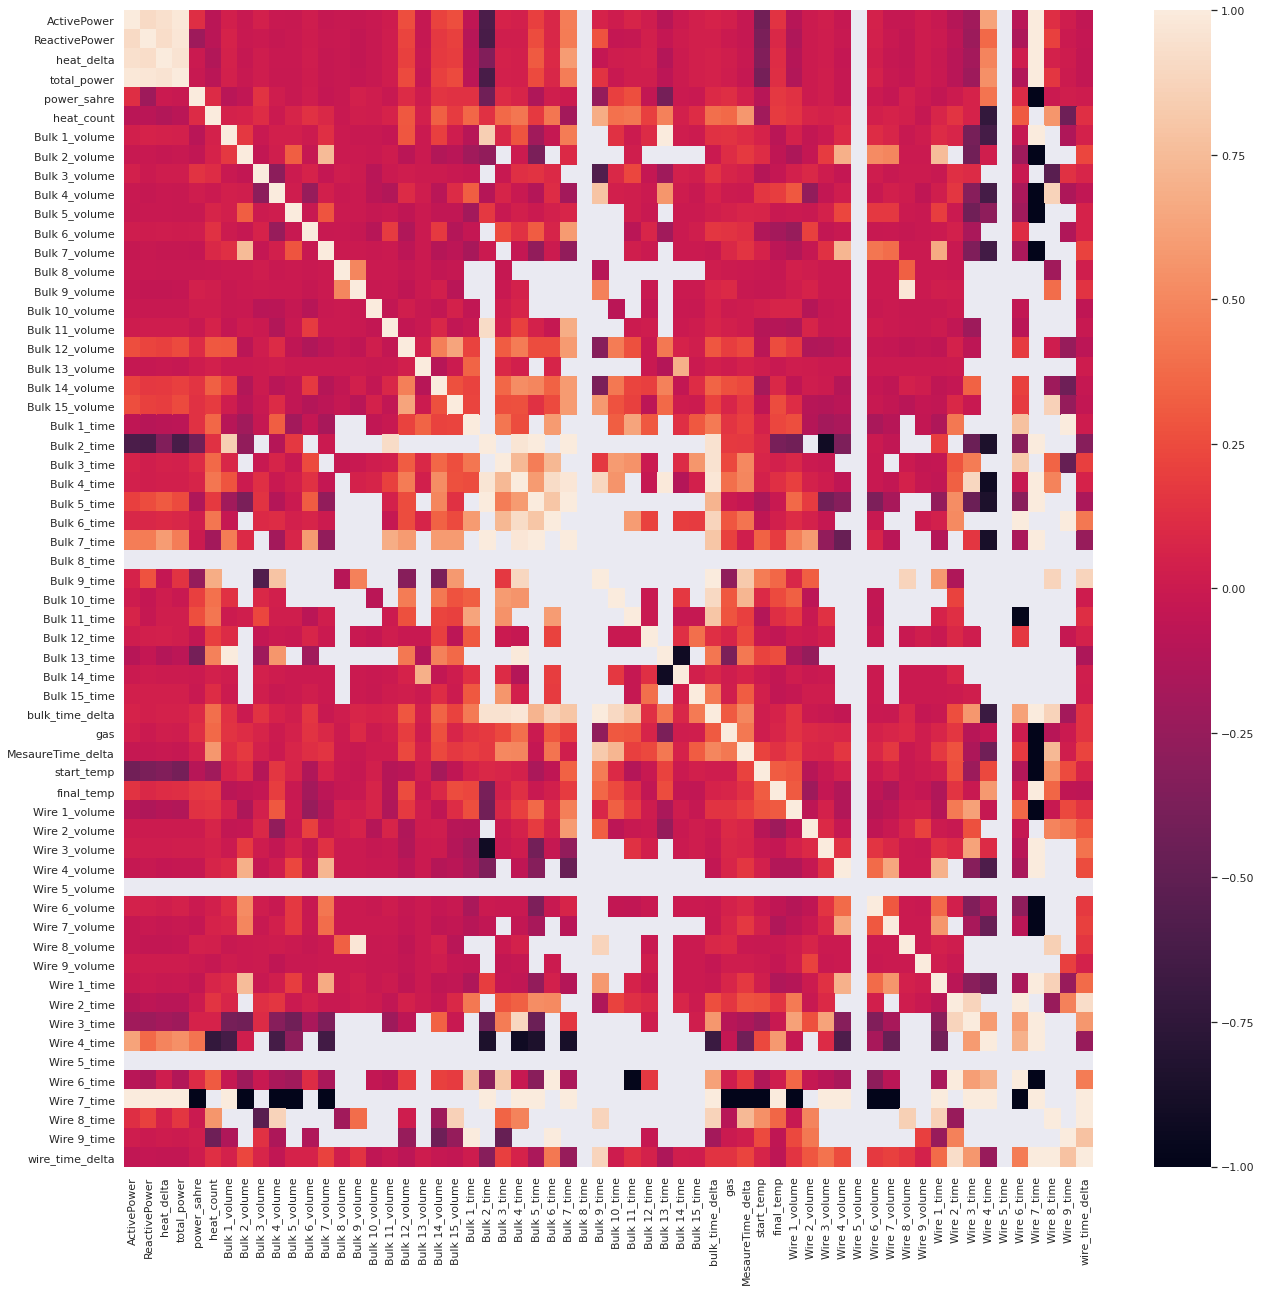

In [86]:
sns.set_theme(rc={'figure.figsize':(21.7,21.27)})
ax = sns.heatmap(df.corr())
ax.set(xlabel="", ylabel="")
plt.show()

Наблюдаем повышенную корреляцию признаков, которые мы синтезировали из мощности нагрева электротдов. Что удивительно мощность коррелирует со временем нагрева. Но видимо горячий электрод быстро не вынешь или ещё какие-то физические ограничения. Попробуем из всех этих взаимнокоррелирующих признаков оставить только 1, например total_power.

У некоторых проволочных материалов наблюдается очнеь отрицетельная корреляция с конечно температруы, но мы пока не будем их сключать.
    Видно невооружённым глазом что Wire 5 volume на вообще ни разу не заполнено. Но ничего, этот столбец будет автоматически удалён при предобработке данных перед передачей их в модель.

In [87]:
df=df.drop(['ActivePower','ReactivePower','heat_delta'],axis=1)

In [88]:
#Раздели получившийся набор данных на обучающий и тестовый
df_train, df_test = train_test_split(df, test_size=0.25, random_state=seed)

x_train=df_train.drop(['final_temp'], axis=1)
y_train=df_train['final_temp']
x_test=df_test.drop(['final_temp'], axis=1)
y_test=df_test['final_temp']


In [89]:
print(x_train.shape[0]," - размер обучающей выборки")
print(x_test.shape[0]," - размер тестовой выборки")

1708  - размер обучающей выборки
570  - размер тестовой выборки


# Моделирование

Сначала подготовим данные для обучения модели, поработав с пропусками и нормализацией признаков.

In [90]:
steps = [
    ('imputer', IterativeImputer(max_iter=10, random_state=seed)),
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif, k='all'))
]

In [91]:
pipeline = Pipeline(steps)
pipeline

Pipeline(steps=[('imputer', IterativeImputer(random_state=40324)),
                ('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k='all'))])

In [92]:
pipeline.fit(x_train,y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10 29 40 42 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Pipeline(steps=[('imputer', IterativeImputer(random_state=40324)),
                ('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k='all'))])

In [93]:
px_train=pipeline.transform(x_train)

## Решающее дерево

In [94]:
dtr_model = DecisionTreeRegressor(random_state=seed)

In [95]:
dtr_model

DecisionTreeRegressor(random_state=40324)

In [96]:
kf =KFold(n_splits=5, shuffle=True, random_state=seed)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(px_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 1366, Test set:342
Fold:2, Train set: 1366, Test set:342
Fold:3, Train set: 1366, Test set:342
Fold:4, Train set: 1367, Test set:341
Fold:5, Train set: 1367, Test set:341


In [97]:
eva=pd.DataFrame(columns=['Model','MAE_cv','standard deviation'])

In [98]:
def save_score(score):
    if score[0]<0:
        d = [np.average(-score), np.std(-score)]
    else:
        d = [np.average(score), np.std(score)]
    return d

In [99]:
score = cross_val_score(dtr_model, px_train, y_train, cv= kf, scoring="neg_mean_absolute_error")
print(f'Scores for each fold: {score}')


Scores for each fold: [ -8.97953216 -10.02631579  -9.30116959  -9.09970674  -9.03812317]


In [100]:

eva.loc[len(eva)] = ["Decision Tree Regressor"] + save_score(score)
eva

,Model,MAE_cv,standard deviation
0,Decision Tree Regressor,9.288969,0.384272


Результаты не достаточно хорошие. МАЕ на кросс-валидации не достигают целевого ориентира в 6,8.

## Модель бустинга

In [101]:
gbr_model = GradientBoostingRegressor(random_state=seed)
score = cross_val_score(gbr_model, px_train, y_train, cv= kf, scoring="neg_mean_absolute_error")
eva.loc[len(eva)] = ["Gradient Boosting Regressor"] + save_score(score)

In [102]:
eva

,Model,MAE_cv,standard deviation
0,Decision Tree Regressor,9.288969,0.384272
1,Gradient Boosting Regressor,6.399580,0.156144


Результат модели Градиентного Бустинга укладывается в целевое значение МАЕ<6,8. И есть шанс, что он воспризведётся на тестовом наборе данных.

## Нейросеть

In [103]:
def create_model2(input_shape, dense=128, dropout=0.6, lr=0.001):
    model2=Sequential() 
    model2.add(Dense(input_shape, activation="relu")) 
    model2.add(Normalization(axis=None))
    model2.add(Dropout(dropout))
    model2.add(Dense(dense, activation="relu")) 
    model2.add(Dense(64, activation="relu")) 
    model2.add(Dense(1)) 
    ptimizer = Adam(learning_rate=lr)
    model2.compile(optimizer=ptimizer, loss='mae', metrics=['mae'])
    return model2

## Оптимизация гипер-параметров

In [104]:
def optimize_structure(trial):
    n = trial.suggest_int("n_units", 32, 512)
    d=trial.suggest_float("dropout", 0.4, 0.75)
    lr=trial.suggest_float("learning_rate", 0.00001, 0.01)
    net = create_model2(px_train.shape[-1], dense=n, dropout=d, lr=lr)
    num_epochs = 50
    for train_index, test_index in kf.split(px_train, y_train):
        x=px_train[train_index]
        y=y_train.iloc[train_index]
        vx=px_train[test_index]
        vy=y_train.iloc[test_index]
        net.fit(x = x, y = y, batch_size=64, epochs=num_epochs, validation_data=(vx, vy),verbose=0)
    
        prdz = net.predict(vx)
        mae_=mean_absolute_error(vy,prdz)
    if trial.should_prune():
            raise optuna.TrialPruned()
    return mae_

In [105]:
if __name__ == "__main__":
    study = optuna.create_study(direction="minimize",pruner=optuna.pruners.HyperbandPruner())
    study.optimize(optimize_structure, n_trials=5, timeout=9000)

    pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
    complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

    print("Study statistics: ")
    print("  Number of finished trials: ", len(study.trials))
    print("  Number of pruned trials: ", len(pruned_trials)) 
    print("  Number of complete trials: ", len(complete_trials))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: ", trial.value)

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2024-03-14 10:18:48,523] A new study created in memory with name: no-name-770d1e14-c3f0-4d01-b587-ffb2e9d135d6
2024-03-14 10:18:48.528592: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


11/11 [==============================] - 0s 1ms/step


[I 2024-03-14 10:19:20,516] Trial 0 finished with value: 6.538996632148094 and parameters: {'n_units': 97, 'dropout': 0.6904081965201112, 'learning_rate': 0.003146940786065352}. Best is trial 0 with value: 6.538996632148094.


11/11 [==============================] - 0s 1ms/step


[I 2024-03-14 10:19:52,493] Trial 1 finished with value: 8.632390086601907 and parameters: {'n_units': 178, 'dropout': 0.7269555415495171, 'learning_rate': 0.006035092537231786}. Best is trial 0 with value: 6.538996632148094.


11/11 [==============================] - 0s 1ms/step


[I 2024-03-14 10:20:24,871] Trial 2 finished with value: 9.277448279417156 and parameters: {'n_units': 183, 'dropout': 0.6725911399985012, 'learning_rate': 0.00042014112202521016}. Best is trial 0 with value: 6.538996632148094.


11/11 [==============================] - 0s 1ms/step


[I 2024-03-14 10:20:55,096] Trial 3 finished with value: 7.080292553496151 and parameters: {'n_units': 64, 'dropout': 0.5838506793681716, 'learning_rate': 0.005980696028859432}. Best is trial 0 with value: 6.538996632148094.


11/11 [==============================] - 0s 2ms/step


[I 2024-03-14 10:21:28,727] Trial 4 finished with value: 7.578705281456195 and parameters: {'n_units': 252, 'dropout': 0.4337031651526011, 'learning_rate': 0.00462920000437343}. Best is trial 0 with value: 6.538996632148094.


Study statistics: 
  Number of finished trials:  5
  Number of pruned trials:  0
  Number of complete trials:  5
Best trial:
  Value:  6.538996632148094
  Params: 
    n_units: 97
    dropout: 0.6904081965201112
    learning_rate: 0.003146940786065352


In [106]:
n = trial.params['n_units']
d = trial.params['dropout']
lr = trial.params['learning_rate']

In [107]:
score=[]
filepath='E:/Data/_Projects/datasets/'

reduce_lr = ReduceLROnPlateau(min_delta=0.05, patience=30, verbose=0)
early_stop = EarlyStopping(monitor='val_mae', min_delta=0.01, mode="auto", patience=40,verbose=0)
f=1
for train_index, test_index in kf.split(px_train, y_train):
    checkpointer = ModelCheckpoint(filepath=filepath+"steel_model"+str(f)+".hdf5",
                                monitor = "val_mae", verbose=0, save_best_only=True, mode = 'auto')
    model2=create_model2(px_train.shape[-1], dense=n, dropout=d, lr=lr)
    x=px_train[train_index]
    y=y_train.iloc[train_index]
    vx=px_train[test_index]
    vy=y_train.iloc[test_index]
    model2.fit(x= x, y= y, batch_size=64, epochs=250, validation_data=(vx, vy),callbacks=[reduce_lr,checkpointer],verbose=0)
    model2.load_weights(filepath+"steel_model"+str(f)+".hdf5")
    prdz=model2.predict(vx)
    mae_=mean_absolute_error(vy,prdz)
    score.append(mae_)
    f = f + 1
eva.loc[len(eva)] = ["Deep learning NeuroNet"]+save_score(score)


11/11 [==============================] - 0s 1ms/step


In [108]:
eva

,Model,MAE_cv,standard deviation
0,Decision Tree Regressor,9.288969,0.384272
1,Gradient Boosting Regressor,6.399580,0.156144
2,Deep learning NeuroNet,6.399985,0.344583


**Вывод**  
Нейросеть с глубоким обучениям показала средний результат, но печально то, что МАЕ всё равно больше чем у градиентного бустинга хотя и не так на много. Среднеквадратическое отклонение ошибок в разы выше чем у "градиентного бустинга".  
У нас есть модель, показывающая вполне походящие результаты по кросс-валидации. Но теперь надо убедиться, что она ещё будет работать на тех данных, которые не видела при обучении.

## Тестирование модели

In [109]:
px_test=pipeline.transform(x_test)

In [110]:
px_test.shape

(570, 54)

In [111]:
t_eva=eva.iloc[1]
gbr_model.fit(px_train,y_train)
predz = gbr_model.predict(px_test)
mae_ = mean_absolute_error(y_test,predz)
r2=r2_score(y_test,predz)
t_eva['test_MAE']=mae_
t_eva['test_R2']=r2
t_eva
    
    

/tmp/ipykernel_42724/1397515954.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_eva['test_MAE']=mae_
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/tmp/ipykernel_42724/1397515954.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_eva['test_R2']=r2


Model                 Gradient Boosting Regressor
MAE_cv                                    6.39958
standard deviation                       0.156144
test_MAE                                 6.485511
test_R2                                  0.390508
Name: 1, dtype: object

Итак, у нас есть однозначный победитель - модель градиентного бустинга. Приемлемый результат на тестовой выборке. Показано МАЕ  ниже чем целевое значнеие МАЕ=6,8.  Невысокое значение метрики R2>40% говорит от том, что модель меньше чем на половину объясняет всё изменение конечной температуры через используемые параметры.
Теперь сравним её с предсказаниями dummy-алгоритмов.

In [112]:
dict_classifiers = {
    "Dummny:mean":DummyRegressor(strategy='mean'),
    "Dummny:median":DummyRegressor(strategy='median'),
}

In [113]:
dict_models = {}
for classifier_name, classifier in list(dict_classifiers.items()):
    classifier.fit(px_train, y_train)

    yp=classifier.predict(px_test)
    test_score = mean_absolute_error(y_test,yp)

    dict_models[classifier_name] = {'model': classifier, 'test_MAE': test_score}
print(dict_models)

{'Dummny:mean': {'model': DummyRegressor(), 'test_MAE': 8.178357779695133}, 'Dummny:median': {'model': DummyRegressor(strategy='median'), 'test_MAE': 8.150877192982456}}


Прямолинейные модели, которые всегда выбирают среднее или даже медианное значение дали плохой результат. Хуче чем наша модель градиентного бустинга и хуже чем требуемый уровень МАЕ=6,8.

In [114]:
# Оценка важности факторов
result = permutation_importance(gbr_model, px_train, y_train, n_repeats=10, random_state=seed)

# Вывод важности факторов
factors=pd.DataFrame(columns=['factor','importance'])
for i, importance in enumerate(result.importances_mean):
    factors.loc[len(factors)] = [x_train.columns[i],importance]   

In [115]:
f=factors.sort_values(by='importance', ascending=False).head(10)
f

,factor,importance
35,MesaureTime_delta,0.405572
0,total_power,0.211454
2,heat_count,0.177046
36,start_temp,0.060440
1,power_sahre,0.060126
8,Bulk 6_volume,0.042785
14,Bulk 12_volume,0.035528
37,Wire 1_volume,0.033128
34,gas,0.032421
17,Bulk 15_volume,0.029988


Наиболее влиющими факторами на конечную температуру стали оказались - время варки и общая мощность нагрева, далее следует количество нагревов, и начиная с соотношения активной и реактивной мощности  сила влияния факторов значительно сокращается. Подавляющее большинство добавок вообще статистически не значимо.

[]

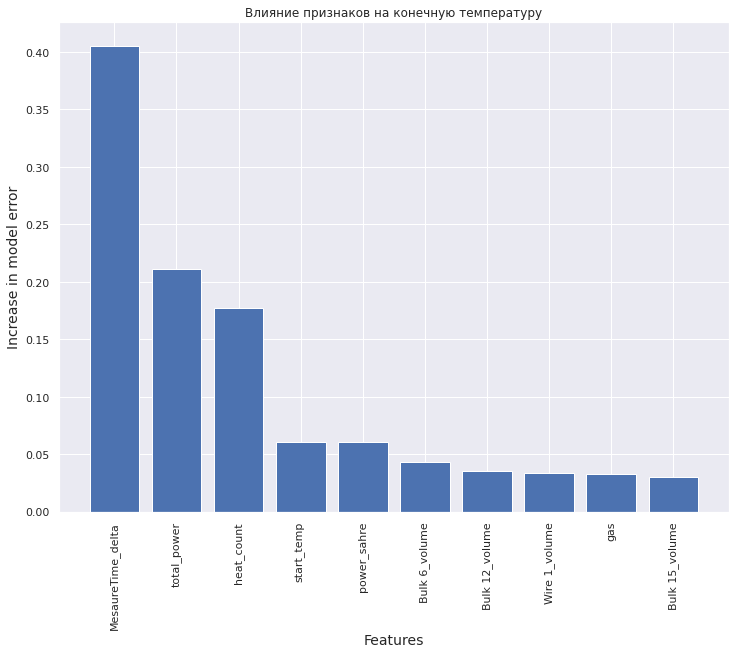

In [116]:
sns.set_theme(rc={'figure.figsize':(12,9)})
plt.bar(f['factor'],f['importance'])
plt.title('Влияние признаков на конечную температуру')
plt.xlabel("Features", fontsize = 14)
plt.ylabel("Increase in model error", fontsize = 14)
plt.xticks(rotation=90)
plt.plot()

In [117]:
#Посмотрим как изменится качество работы модели, если оставить толко ТОП-10 самых сильно влияющих признаков.
cols=f['factor']
x_train_short=x_train[cols]
x_test_short=x_test[cols]
x_train_short=pipeline.fit_transform(x_train_short,y_train)
x_test_short=pipeline.transform(x_test_short)

gbr_model.fit(x_train_short, y_train)
predz = gbr_model.predict(x_test_short)
mae_ = mean_absolute_error(y_test,predz)
r2=r2_score(y_test,predz)
print("МАЕ при сокращённом наборе признаков:", mae_)
print("R2 при сокращённом наборе признаков:", r2)

МАЕ при сокращённом наборе признаков: 6.3757706502242755
R2 при сокращённом наборе признаков: 0.4235536930917567


ВЫВОД:
- Мы проверили как нашам модель градиентного бустинга работает на тестовой выборке - результаты оказались достаточно точными,  превосходящими как целевой уровень, заданный заказчиком, так и в сравнении с dummy-алгоритмами.
- Были выбранры ТОП-10 показателей. Если обучать модель только на них, то точность почти не снижается, и R2 отстаётся около 40 процентов, что оставшиеся признаки скорее запутывают модель.
- Значимые факторы это в первую очередь время варки и общая мощность нагрева, далее следует количество нагревов. Далее мы видим серьёзнае снижение степени влияния факторов и замыкающий десятку показатель (объём сыпучей добавки №15) уже оказыает эффект в 20 раз более слабыйчем стартовая температура. Что уж говорить о последующих показателях.


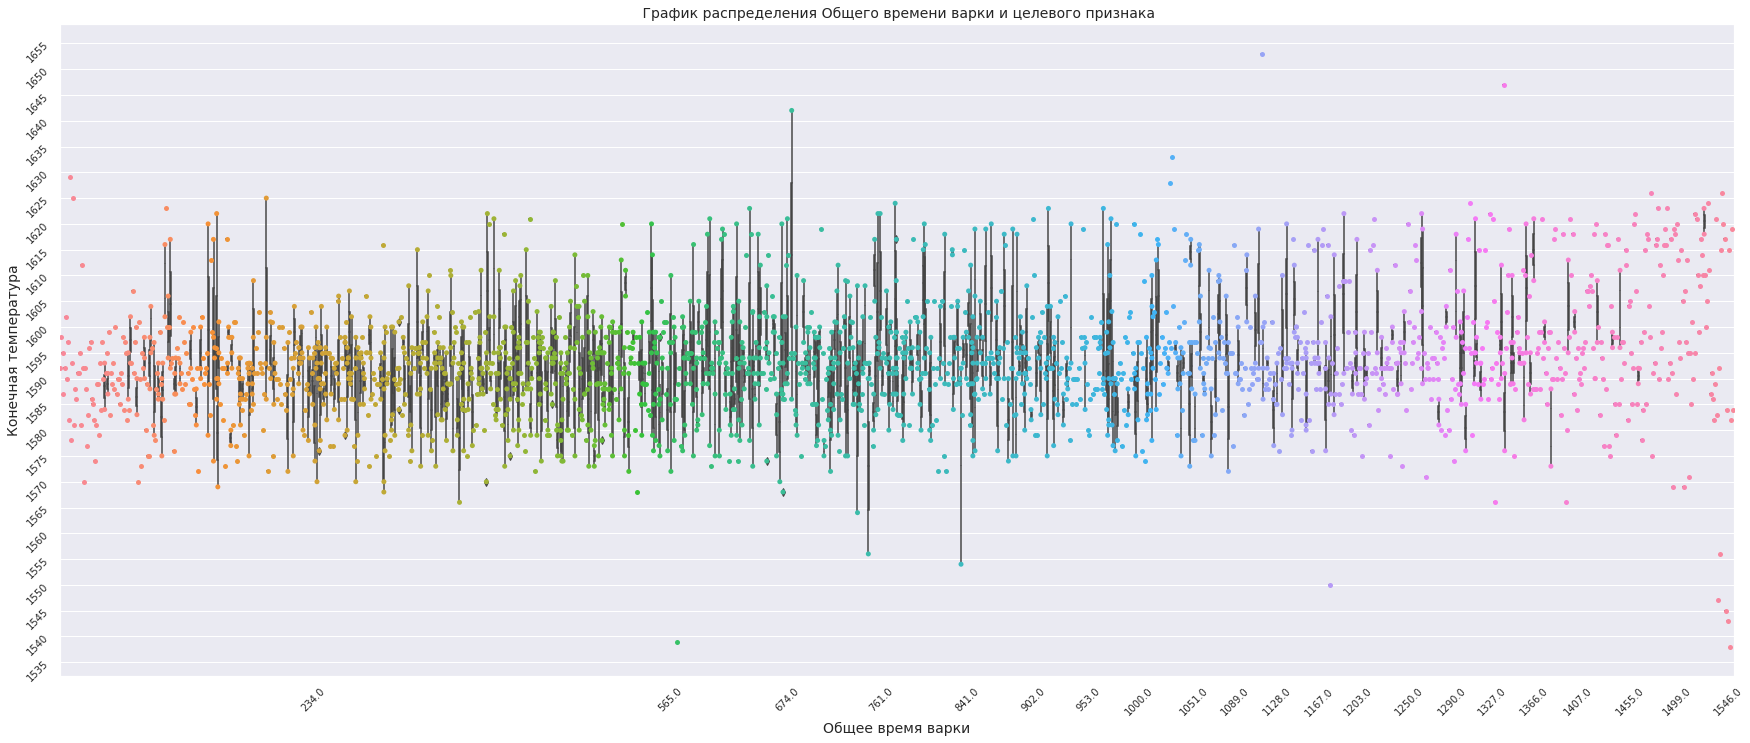

In [118]:

fig, ax = plt.subplots(figsize=(30, 12))
ax = sns.boxplot(x="MesaureTime_delta", y = "final_temp", data=df)
ax.tick_params(rotation=90, labelsize = 12)
ax = sns.stripplot(x = "MesaureTime_delta", y = "final_temp", data=df)

plt.gca().set_xticks(ticks=(df['MesaureTime_delta'].sort_values(ascending=True).unique()))
plt.gca().locator_params(axis='both', nbins=50) 
plt.gca().tick_params(rotation=45, labelsize = 10)
plt.gca().set_xlabel("Общее время варки", fontsize = 14)
plt.gca().set_ylabel("Конечная температура", fontsize = 14)
plt.gca().set_xticklabels(list(df['MesaureTime_delta'].sort_values(ascending=True).unique()))
plt.title(' График распределения Общего времени варки и целевого признака', fontsize = 14)
plt.show()

/tmp/ipykernel_42724/1487412415.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(list(x_train['MesaureTime_delta'].sort_values(ascending=True).unique()))
/tmp/ipykernel_42724/1487412415.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(list(y_train.sort_values(ascending=True).unique()))


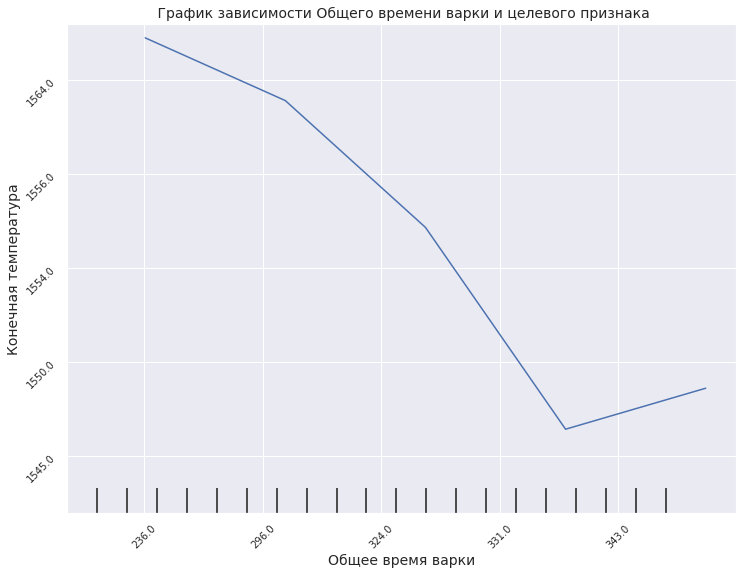

In [119]:
x=pd.DataFrame(x_train_short)
x.columns=cols

features, feature_names = [(0,)], [f"Features #{i}" for i in range(x.shape[1])]
deciles = {0: np.linspace(-1.2, 1.2, num=20)}
pd_results = partial_dependence(
     gbr_model, x, features=0, kind="average", grid_resolution=5)
display = PartialDependenceDisplay(
     [pd_results], features=features, feature_names=feature_names,
     target_idx=0, deciles=deciles,pdp_lim={1: (-1.8,0.8)}
 )

display.plot()
plt.gca().locator_params(axis='y', nbins=10) 
plt.gca().tick_params(rotation=45, labelsize = 10)
plt.gca().set_xlabel("Общее время варки", fontsize = 14)
plt.gca().set_ylabel("Конечная температура", fontsize = 14)
plt.gca().set_xticklabels(list(x_train['MesaureTime_delta'].sort_values(ascending=True).unique()))
plt.gca().set_yticklabels(list(y_train.sort_values(ascending=True).unique()))
plt.title(' График зависимости Общего времени варки и целевого признака', fontsize = 14)
plt.show()

/tmp/ipykernel_42724/2587448519.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(list(x_train['total_power'].sort_values(ascending=True).unique()))
/tmp/ipykernel_42724/2587448519.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(list(y_train.sort_values(ascending=True).unique()))


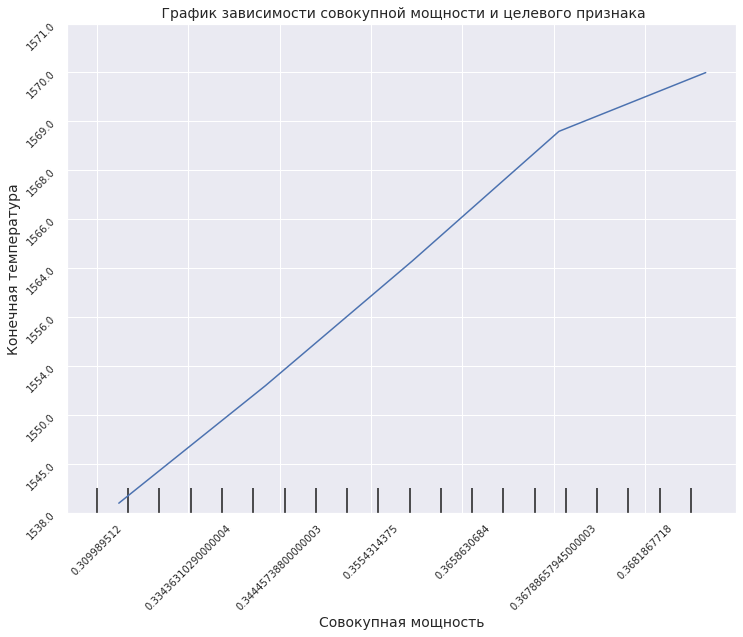

In [120]:
features, feature_names = [(0,)], [f"Features #{i}" for i in range(x.shape[1])]
deciles = {0: np.linspace(-1.5, 1.75, num=20)}
pd_results = partial_dependence(
     gbr_model, x, features=1, kind="average", grid_resolution=5)
display = PartialDependenceDisplay(
     [pd_results], features=features, feature_names=feature_names,
     target_idx=0, deciles=deciles,pdp_lim={1: (-4,6)}
 )
display.plot()

plt.gca().locator_params(axis='both', nbins=10) 
plt.gca().tick_params(rotation=45, labelsize = 10)
plt.gca().set_xlabel("Совокупная мощность", fontsize = 14)
plt.gca().set_ylabel("Конечная температура", fontsize = 14)
plt.gca().set_xticklabels(list(x_train['total_power'].sort_values(ascending=True).unique()))
plt.gca().set_yticklabels(list(y_train.sort_values(ascending=True).unique()))
plt.title(' График зависимости совокупной мощности и целевого признака', fontsize = 14)
plt.show()

**Выводы по исследованию**  
1. Был сформирован набор данных из предложенных заказчиком табилц. В нём были обработаны пропуски и аномалии.  
2. На получившемся наборе данных были обучены модели, лушчей из которых оказалась модель на основе градиентного бустинга. Она показала МАЕ на тестовой выборке менее 6,4 при заданнном заказчиком ориентире 6,8. Также результат был лучше чем у других моделей и прямолинейных алгоритмов, выбирающих среднее значение или медиану.  
3. Для улучшения работы предлагается:  
   - собрать больше данных;  
   - откалибровать датчики, так чтобы они были синхронизированы и хронология событий соответствовала описанной;  
   - изменить формат таблицы steel.data_arc, так чтобы каждой партии соответствовала одна строка, так можно будет учитывать каждый запуск электродов, а не медианное по партии как делали мы;
   - перспективным представляется сокращение номенклатуры сыпучих и проволочных материалов, так как большинство из них оказывают крайне слабое влияние на конечную температуру;  
   - модель совершенно не учитывает качество получающейся стали, с одной стороны этого не было в техническом задании, с другой стороны это слишком важный фактор, чтобы его игнорировать при выработке управленческих решений.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-процесса-обработки" data-toc-modified-id="Описание-процесса-обработки-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание процесса обработки</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Данные-об-электродах" data-toc-modified-id="Данные-об-электродах-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Данные об электродах</a></span></li><li><span><a href="#Данные-об-объёме-сыпучих-материалов" data-toc-modified-id="Данные-об-объёме-сыпучих-материалов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Данные об объёме сыпучих материалов</a></span></li><li><span><a href="#Данные-о-времени-подачи-сыпучих-материалов" data-toc-modified-id="Данные-о-времени-подачи-сыпучих-материалов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Данные о времени подачи сыпучих материалов</a></span></li><li><span><a href="#Данные-о-продувке-сплава-газом" data-toc-modified-id="Данные-о-продувке-сплава-газом-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Данные о продувке сплава газом</a></span></li><li><span><a href="#Данные-об-измерениях-температуры" data-toc-modified-id="Данные-об-измерениях-температуры-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Данные об измерениях температуры</a></span></li><li><span><a href="#Данные-об-объёме-проволочных-материалов" data-toc-modified-id="Данные-об-объёме-проволочных-материалов-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Данные об объёме проволочных материалов</a></span></li><li><span><a href="#Данные-о-времени-подачи-проволочных-материалов" data-toc-modified-id="Данные-о-времени-подачи-проволочных-материалов-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Данные о времени подачи проволочных материалов</a></span></li><li><span><a href="#Формирование-надобра-данных-для-моделирования" data-toc-modified-id="Формирование-надобра-данных-для-моделирования-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Формирование надобра данных для моделирования</a></span></li><li><span><a href="#Исследовательский-анализ-данных-объединённой-таблицы" data-toc-modified-id="Исследовательский-анализ-данных-объединённой-таблицы-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Исследовательский анализ данных объединённой таблицы</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Модель-бустинга" data-toc-modified-id="Модель-бустинга-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Модель бустинга</a></span></li><li><span><a href="#Нейросеть" data-toc-modified-id="Нейросеть-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Нейросеть</a></span></li><li><span><a href="#Оптимизация-гипер-параметров" data-toc-modified-id="Оптимизация-гипер-параметров-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Оптимизация гипер-параметров</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>